train on Patient 1 and 2  for only Del_st and Del_end

## Load dependences and setting output configuration

In [1]:
import numpy as np
from keras.utils.np_utils import to_categorical
import keras
%pylab inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


## Load data from npy files

In [2]:
window_size = 200

In [148]:
datapath = 'F:/1_GTCG/data/TestData_060818.tar/TestData_060818/Patient1' 
germline_1_datapath = datapath + '/ChannelData/unzipped/'
ger_1_labels_datapath = datapath + '/LabelData/unzipped/'

G1_data_SV = np.empty([0, 27, window_size])
G1_labels_SV =[]
G1_data_noSV = np.empty([0, 27, window_size])
G1_labels_noSV =[]

for i in range(1,22,1):
        G1_data_new =np.load(germline_1_datapath + str(i) + '_channel_maker_real_germline.npy/' + str(i) +'_channel_maker_real_germline.npy')
        G1_labels_new = np.load(ger_1_labels_datapath  +  str(i) +'_label_ci_full_overlap.npy/' +str(i) +'_label_ci_full_overlap.npy') 
        G1_data_new = G1_data_new[np.where(G1_labels_new != 'UK')]
        G1_labels_new = G1_labels_new[np.where(G1_labels_new != 'UK')]
        G1_data_SV_new  = G1_data_new[np.where(G1_labels_new != 'noSV')]
        G1_labels_SV_new  = G1_labels_new[np.where(G1_labels_new != 'noSV')]
        n_windows_sv = G1_data_SV_new.shape[0]
        #G1_data_noSV_new  = G1_data_new[np.where(G1_labels_new == 'noSV')]
        #G1_labels_noSV_new  = G1_labels_new[np.where(G1_labels_new == 'noSV')]
        #G1_data_noSV_new =  G1_data_noSV_new[0:n_windows_sv]
        #G1_labels_noSV_new =  G1_labels_noSV_new[0:n_windows_sv]
        print(str(i) + ':' + str(G1_data_SV_new.shape))
        print(G1_labels_SV_new[0])
        G1_data_SV = np.concatenate((G1_data_SV, G1_data_SV_new))
        G1_labels_SV = np.concatenate((G1_labels_SV, G1_labels_SV_new))
        #G1_data_noSV = np.concatenate((G1_data_noSV, G1_data_noSV_new))
        #G1_labels_noSV = np.concatenate((G1_labels_noSV, G1_labels_noSV_new))

1:(395, 27, 200)
DEL_start
2:(579, 27, 200)
DEL_start
3:(346, 27, 200)
DEL_end
4:(416, 27, 200)
DEL_start
5:(303, 27, 200)
DEL_start
6:(364, 27, 200)
DEL_start
7:(403, 27, 200)
DEL_start
8:(280, 27, 200)
DEL_start
9:(250, 27, 200)
DEL_start
10:(227, 27, 200)
DEL_end
11:(299, 27, 200)
DEL_start
12:(289, 27, 200)
DEL_start
13:(169, 27, 200)
DEL_start
14:(135, 27, 200)
DEL_start
15:(133, 27, 200)
DEL_end
16:(306, 27, 200)
DEL_start
17:(130, 27, 200)
DEL_start
18:(153, 27, 200)
DEL_start
19:(145, 27, 200)
DEL_end
20:(104, 27, 200)
DEL_start
21:(150, 27, 200)
DEL_start


In [243]:
datapath = 'F:/1_GTCG/data/TestData_060818.tar/TestData_060818/Patient2' 
germline_1_datapath = datapath + '/ChannelData/unzipped/'
ger_1_labels_datapath = datapath + '/LabelData/unzipped/'

for i in range(1,22,1):
        G1_data_new =np.load(germline_1_datapath + str(i) + '_channel_maker_real_germline.npy/' + str(i) +'_channel_maker_real_germline.npy')
        G1_labels_new = np.load(ger_1_labels_datapath  +  str(i) +'_label_ci_full_overlap.npy/' +str(i) +'_label_ci_full_overlap.npy') 
        G1_data_new = G1_data_new[np.where(G1_labels_new != 'UK')]
        G1_labels_new = G1_labels_new[np.where(G1_labels_new != 'UK')]
        G1_data_SV_new  = G1_data_new[np.where(G1_labels_new != 'noSV')]
        G1_labels_SV_new  = G1_labels_new[np.where(G1_labels_new != 'noSV')]
        n_windows_sv = G1_data_SV_new.shape[0]
        #G1_data_noSV_new  = G1_data_new[np.where(G1_labels_new == 'noSV')]
        #G1_labels_noSV_new  = G1_labels_new[np.where(G1_labels_new == 'noSV')]
        #G1_data_noSV_new =  G1_data_noSV_new[0:n_windows_sv]
        #G1_labels_noSV_new =  G1_labels_noSV_new[0:n_windows_sv]
        print(str(i) + ':' + str(G1_data_SV_new.shape))
        print(G1_labels_SV_new[0])
        G1_data_SV = np.concatenate((G1_data_SV, G1_data_SV_new))
        G1_labels_SV = np.concatenate((G1_labels_SV, G1_labels_SV_new))
        #G1_data_noSV = np.concatenate((G1_data_noSV, G1_data_noSV_new))
        #G1_labels_noSV = np.concatenate((G1_labels_noSV, G1_labels_noSV_new))

1:(469, 27, 200)
DEL_start
2:(420, 27, 200)
DEL_start
3:(341, 27, 200)
DEL_end
4:(488, 27, 200)
DEL_start
5:(388, 27, 200)
DEL_end
6:(399, 27, 200)
DEL_start
7:(356, 27, 200)
DEL_start
8:(356, 27, 200)
DEL_end
9:(262, 27, 200)
DEL_start
10:(265, 27, 200)
DEL_start
11:(289, 27, 200)
DEL_start
12:(293, 27, 200)
DEL_start
13:(214, 27, 200)
DEL_start
14:(168, 27, 200)
DEL_end
15:(171, 27, 200)
DEL_start
16:(231, 27, 200)
DEL_start
17:(163, 27, 200)
DEL_start
18:(186, 27, 200)
DEL_start
19:(157, 27, 200)
DEL_end
20:(162, 27, 200)
DEL_start
21:(164, 27, 200)
DEL_start


### Find  the indexes that split the categories

In [244]:
def find_splitting_indices(labels):
    for i in range (0, labels.shape[0] - 1):
        if (labels[i] != labels[i+1]):
            print(i , ': ', labels[i] , labels[i+1] )        

In [5]:
#find_splitting_indices(G1_labels)

In [6]:
#G1_labels_SV = ['DEL'] * G1_labels_SV.shape[0]

In [245]:
sv=G1_data_SV.shape[0]

In [246]:
sv

11518

In [247]:
int(sv/2)

5759

In [248]:
G1_data_noSV  = G1_data_noSV[0:int(sv/2)] 

In [249]:
G1_labels_noSV  =G1_labels_noSV[0:int(sv/2)] 

In [250]:
SV_train = 9000
noSV_train = 2000
SV_val = 1000
noSV_val = 500

In [251]:
X_train = np.concatenate((G1_data_SV[0:SV_train], G1_data_noSV[0:noSV_train ]))
X_val = np.concatenate((G1_data_SV[SV_train:SV_train+SV_val], G1_data_noSV[noSV_train:noSV_train +noSV_val ]))
X_test = np.concatenate((G1_data_SV[SV_train+SV_val:], G1_data_noSV[noSV_train +noSV_val:]))

In [252]:
y_train = np.concatenate((G1_labels_SV[0:SV_train], G1_labels_noSV[0:noSV_train ]))
y_val = np.concatenate((G1_labels_SV[SV_train:SV_train+SV_val], G1_labels_noSV[noSV_train:noSV_train +noSV_val ]))
y_test = np.concatenate((G1_labels_SV[SV_train+SV_val:], G1_labels_noSV[noSV_train +noSV_val:]))

### Number of training, validation and test windows

In [156]:
X_train.shape

(4000, 27, 200)

In [157]:
X_val.shape

(700, 27, 200)

In [158]:
X_test.shape

(876, 27, 200)

In [159]:
y_test.shape

(876,)

In [160]:
number_channels = X_train.shape[1]
number_channels

27

## Normalize data using the reads coverage as parameter and remove uninteresting channels for deletions

In [253]:
coverage = np.median(X_train[:, 0, :]) #the median of the coverage in the normal cells
coverage


29.0

In [254]:
def normalize(X):       
    for i in range (0, len(X)):                              
        for j in range(0,number_channels):                                                                                            
            X[i][j] = np.divide(X[i][j], coverage)*100 
normalize(X_train)
normalize(X_val)
normalize(X_test)

In [255]:
def eliminate_noise_chanels(X):
    return np.delete(X, [4-1,5-1,6-1,7-1,8-1,9-1,10-1,12-1,13-1,15-1,16-1, 17-1,18-1,19-1,23-1,24-1,26-1,27-1], axis=1)
    

In [256]:
def eliminate_distance_chanels(X):
    return np.delete(X, [3,4,7,8], axis=1)

In [257]:
X_train = eliminate_noise_chanels(X_train)
X_val = eliminate_noise_chanels(X_val)
X_test = eliminate_noise_chanels(X_test)

In [258]:
X_train = eliminate_distance_chanels(X_train)
X_val = eliminate_distance_chanels(X_val)
X_test = eliminate_distance_chanels(X_test)

In [259]:
X_train.shape

(9000, 5, 200)

In [260]:
number_channels = X_train.shape[1]
number_channels

5

## Plots several  windows

In [169]:
n_windows = 100
label = ["None"] * number_channels

In [170]:
label[0] = "germline:coverage"
label[1] = "germline:#left clipped reads"
label[2] = "germline:#right clipped reads"
label[3] = "germline:#split reads right split"
label[4] = "germline:#split reads left split"

In [171]:
from numpy import *
import math
import matplotlib.pyplot as plt

colors =['b','g', 'm', 'gray', 'r','c', 'darkgreen' ,'y', 'k', 'orange', 'gray']

def plot_channels(start_window, n_windows):
    for i in range (start_window, start_window + n_windows, 1):
        #print(y_train[i], 'id:', i)
        print('id:', i)
        print('Nanopore:', y_test[i])#, '. DeepSV:', labels[predicted[i]])
        for j in range (0, number_channels):   
            shift = 0
            start =0
            if j in [0,11]:
                shift = -100
            if j > 8:
                start = -60
            Z = [start + shift + 300 + x - 5*j*4 for x in X_test[i][j]]  
            plt.ylim([150,450])
            if np.max(Z) > 1000:
                plt.ylim([-200,1000])
                Z = [start + shift + 300 + x - 5*j*4 - 400 for x in X_test[i][j]]  
            if j>8:
                plt.plot(Z,  label = label[j], linestyle=':', linewidth=1.5, color = colors[j % 9])
            else:
                plt.plot(Z,  label = label[j], color = colors[j])
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 10})    
        plt.show()

id: 0
Nanopore: DEL_start


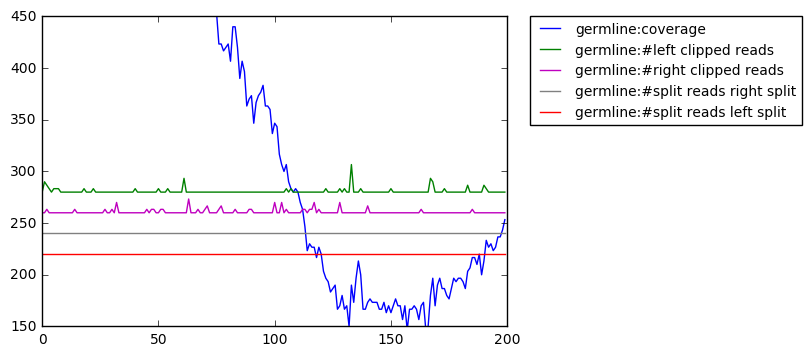

id: 1
Nanopore: DEL_start


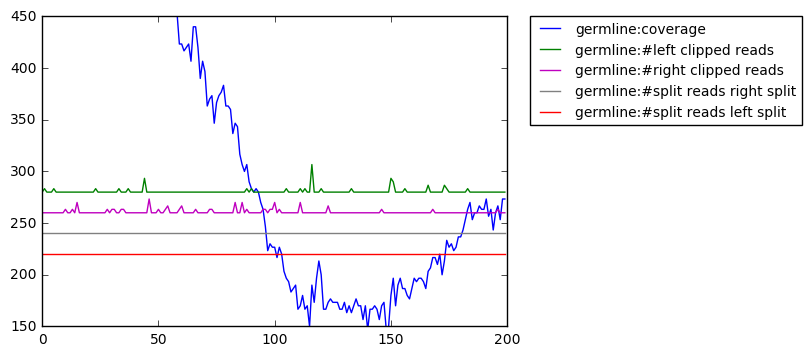

id: 2
Nanopore: DEL_start


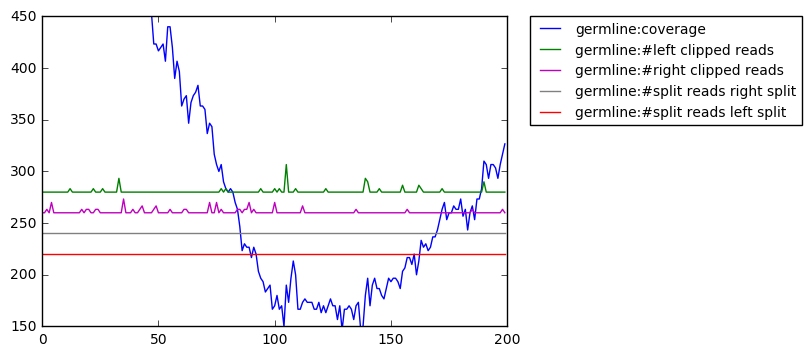

id: 3
Nanopore: DEL_start


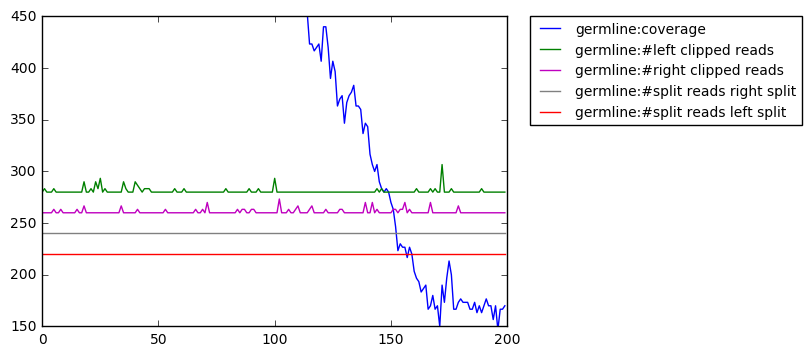

id: 4
Nanopore: DEL_end


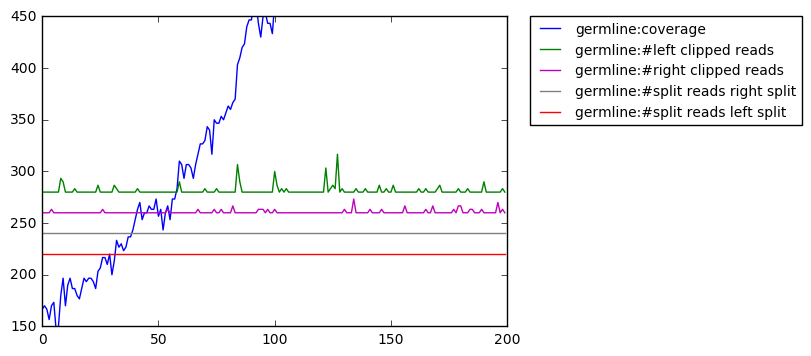

id: 5
Nanopore: DEL_start


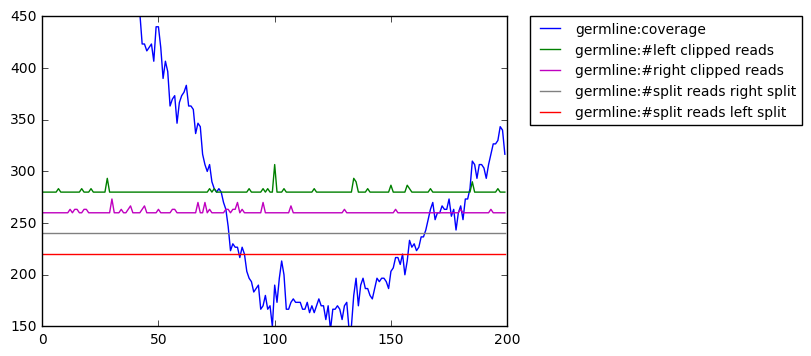

id: 6
Nanopore: DEL_end


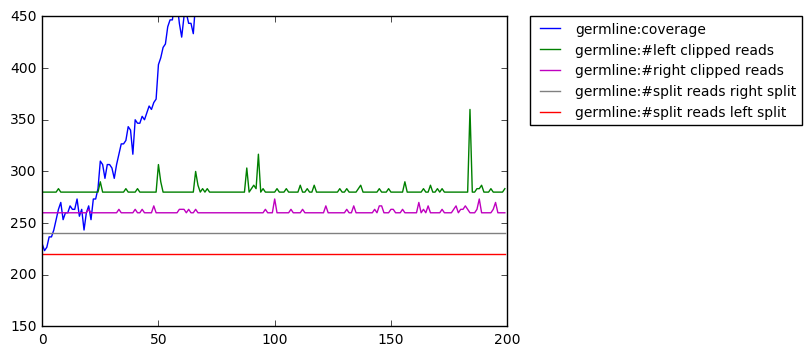

id: 7
Nanopore: DEL_start


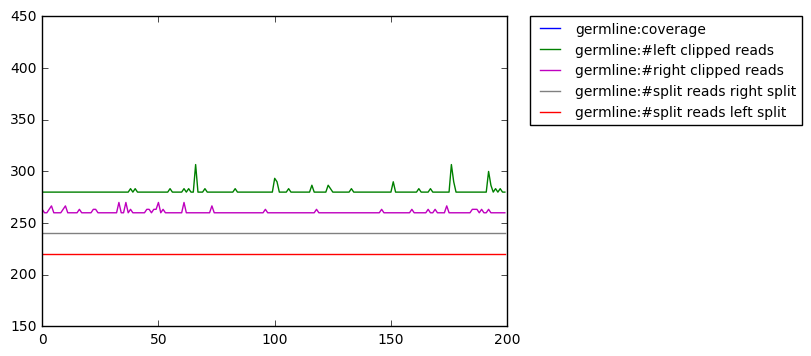

id: 8
Nanopore: DEL_start


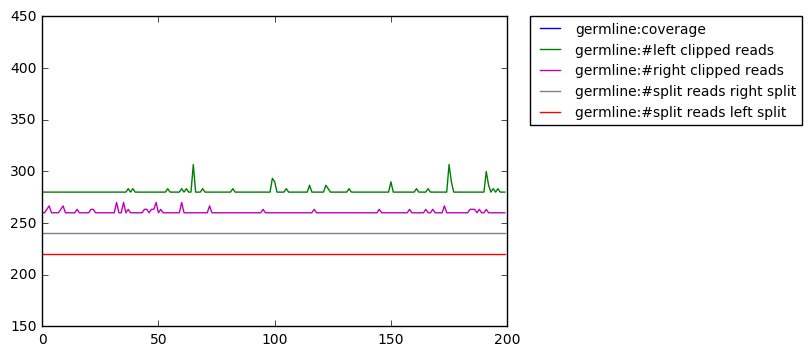

id: 9
Nanopore: DEL_end


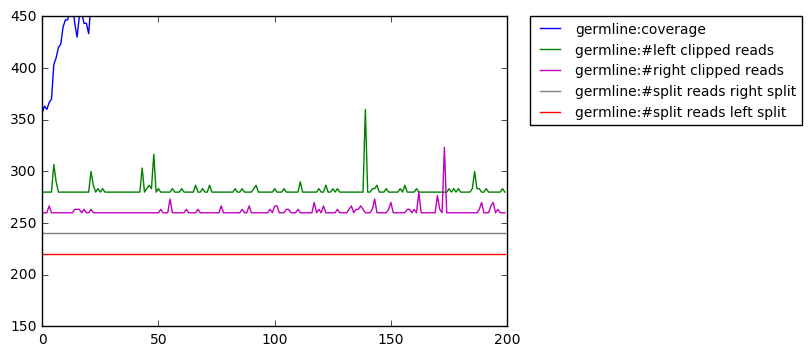

id: 10
Nanopore: DEL_end


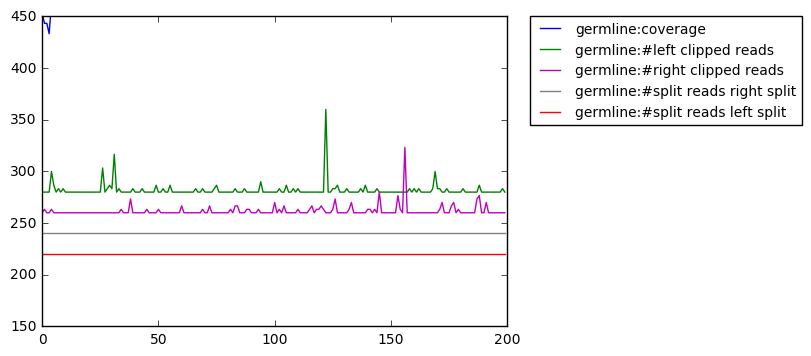

id: 11
Nanopore: DEL_end


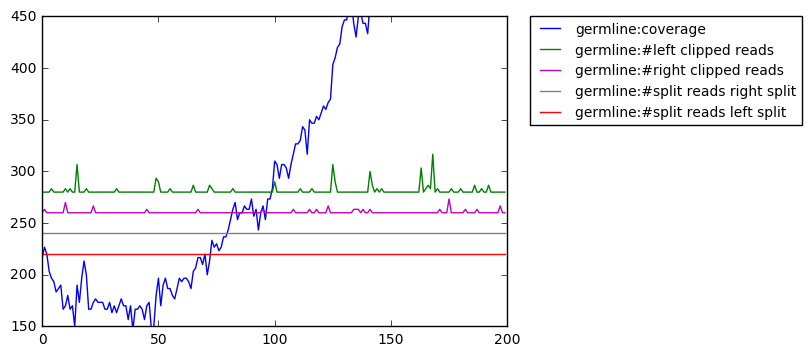

id: 12
Nanopore: DEL_end


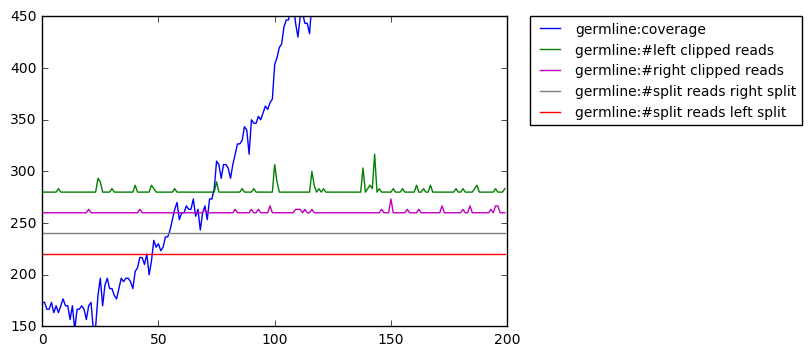

id: 13
Nanopore: DEL_end


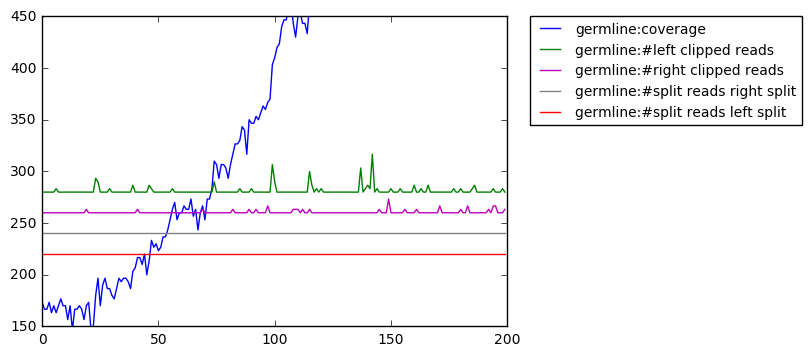

id: 14
Nanopore: DEL_end


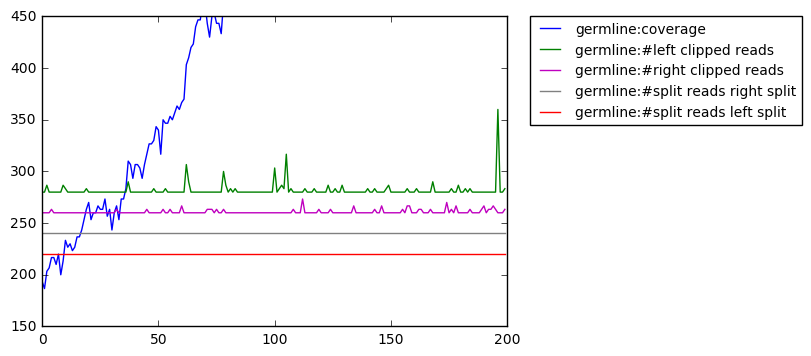

id: 15
Nanopore: DEL_end


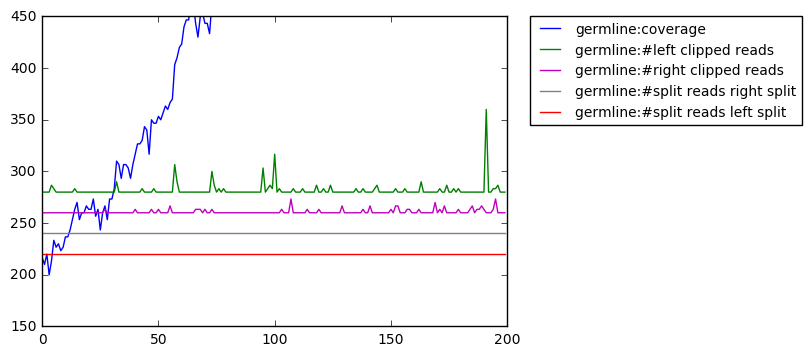

id: 16
Nanopore: DEL_end


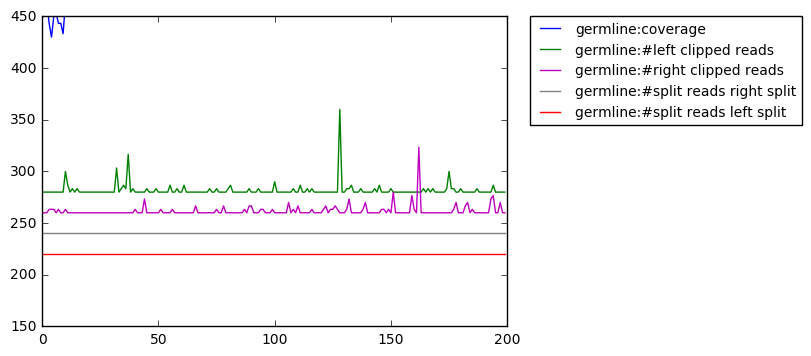

id: 17
Nanopore: DEL_end


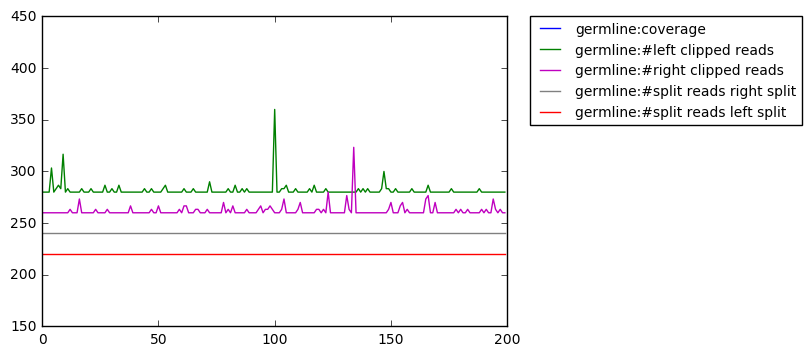

id: 18
Nanopore: DEL_start


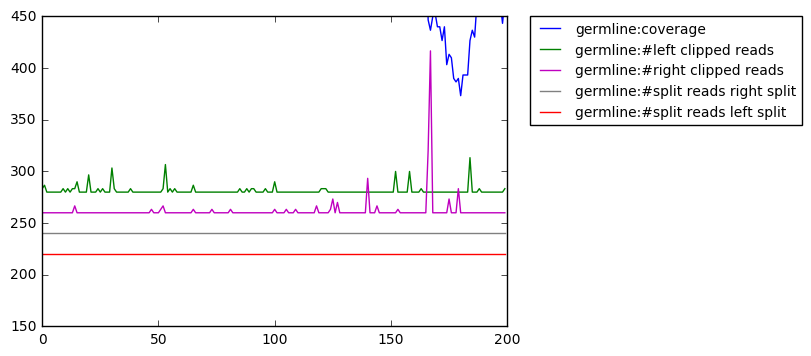

id: 19
Nanopore: DEL_start


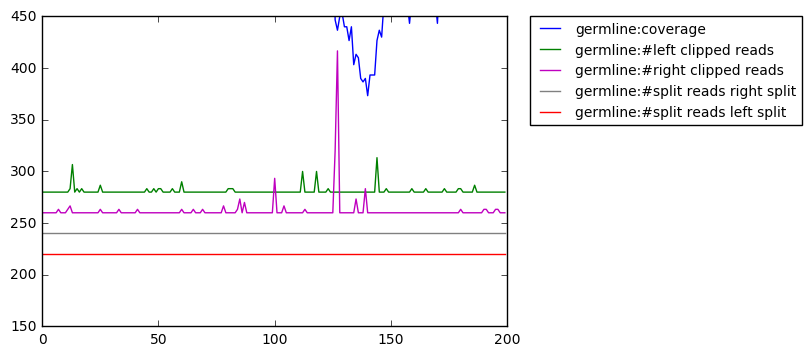

id: 20
Nanopore: DEL_start


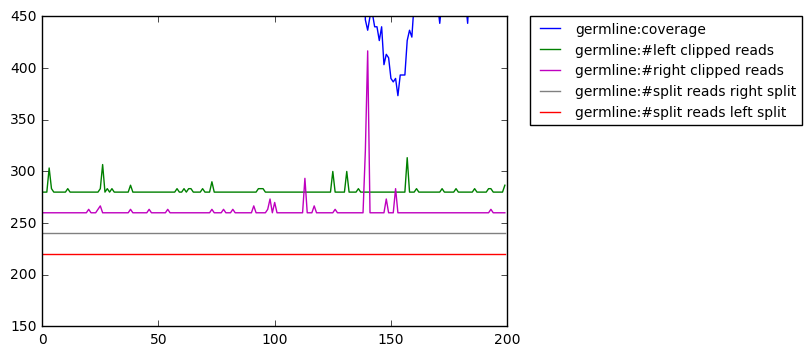

id: 21
Nanopore: DEL_start


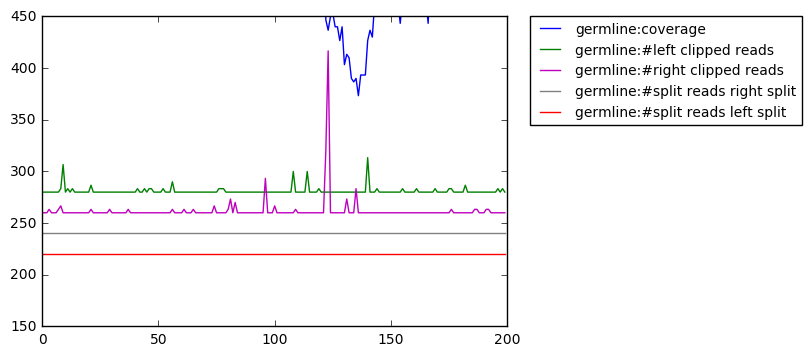

id: 22
Nanopore: DEL_start


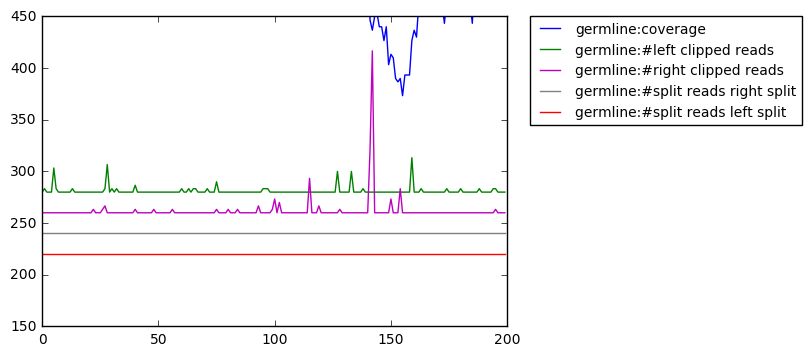

id: 23
Nanopore: DEL_start


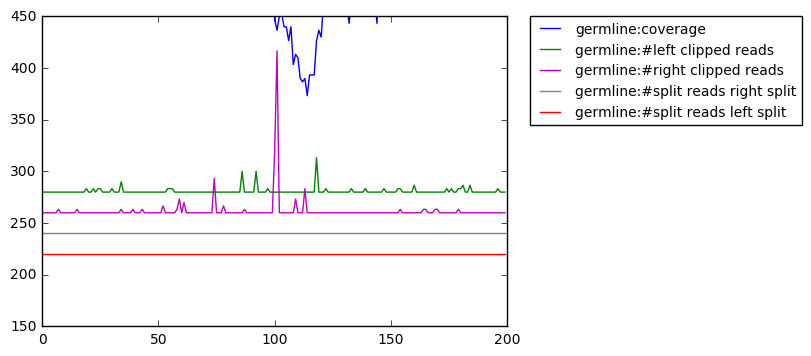

id: 24
Nanopore: DEL_start


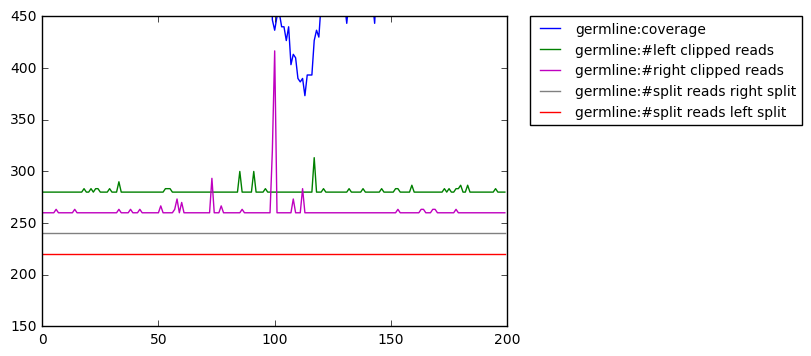

id: 25
Nanopore: DEL_start


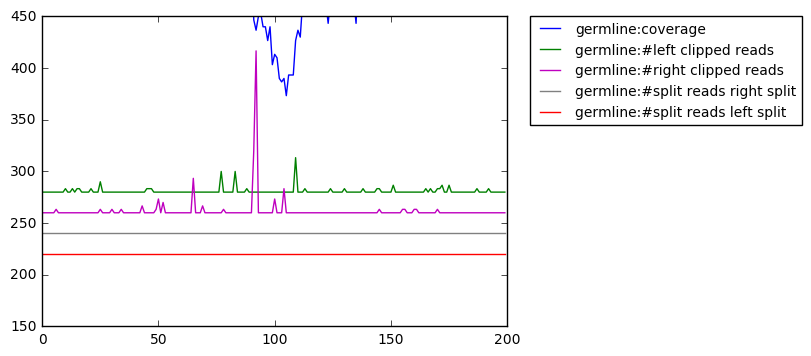

id: 26
Nanopore: DEL_start


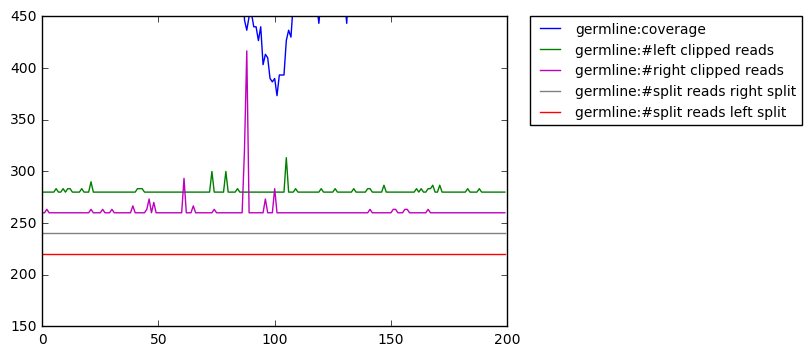

id: 27
Nanopore: DEL_start


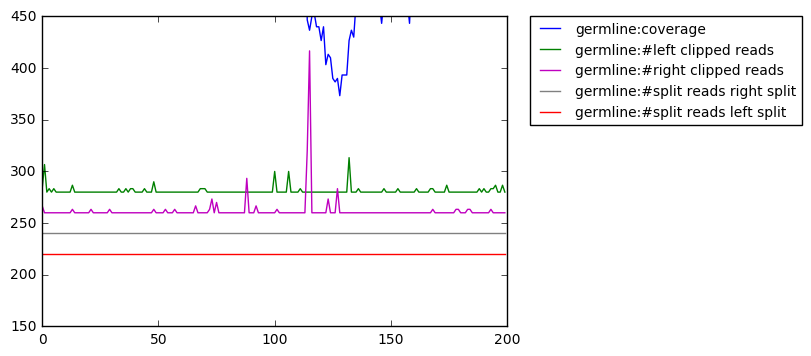

id: 28
Nanopore: DEL_start


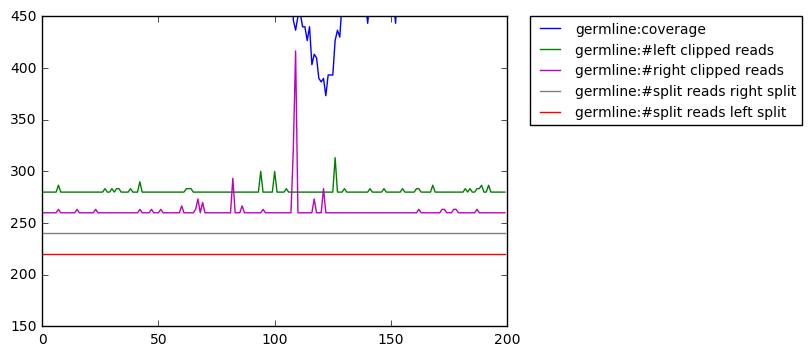

id: 29
Nanopore: DEL_start


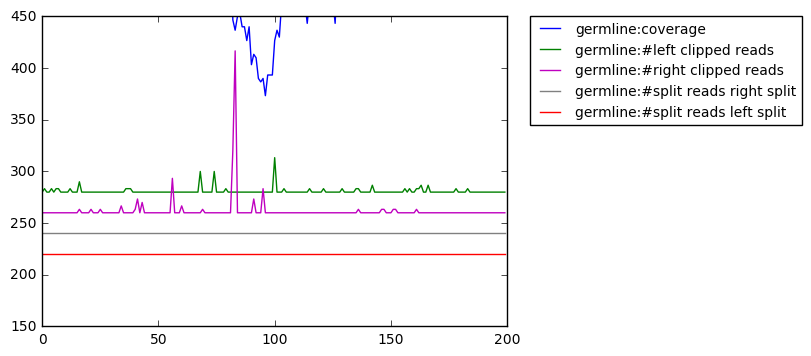

id: 30
Nanopore: DEL_start


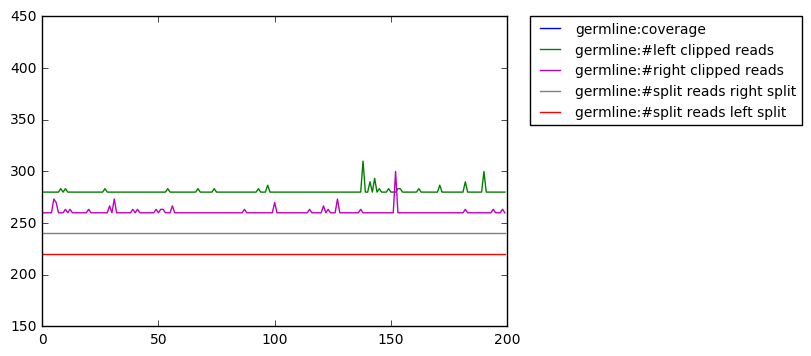

id: 31
Nanopore: DEL_start


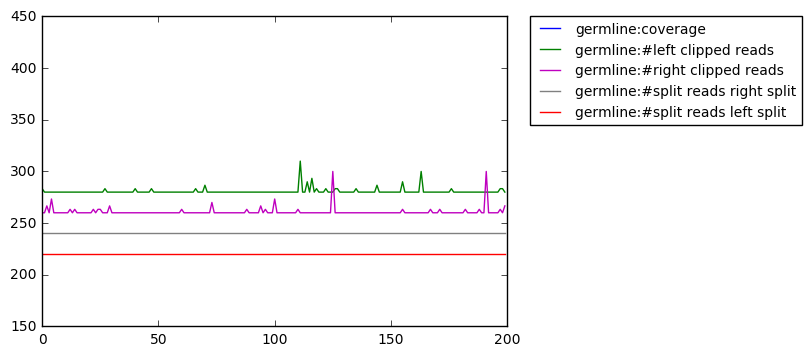

id: 32
Nanopore: DEL_start


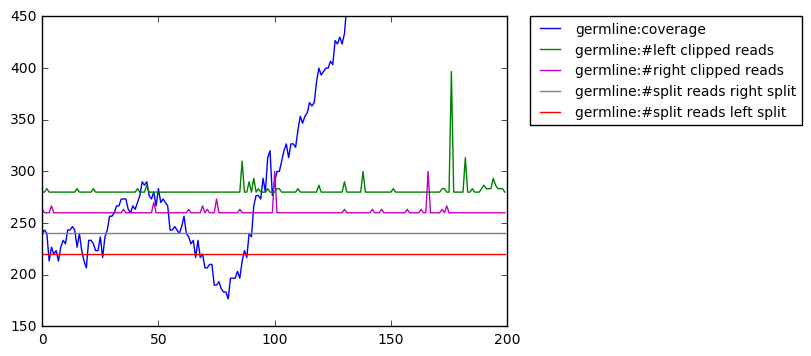

id: 33
Nanopore: DEL_start


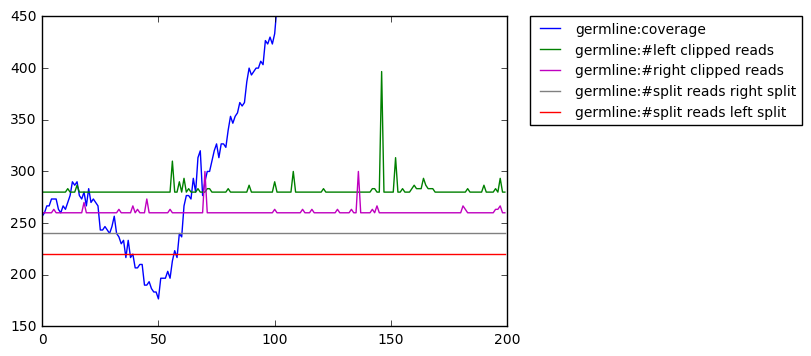

id: 34
Nanopore: DEL_start


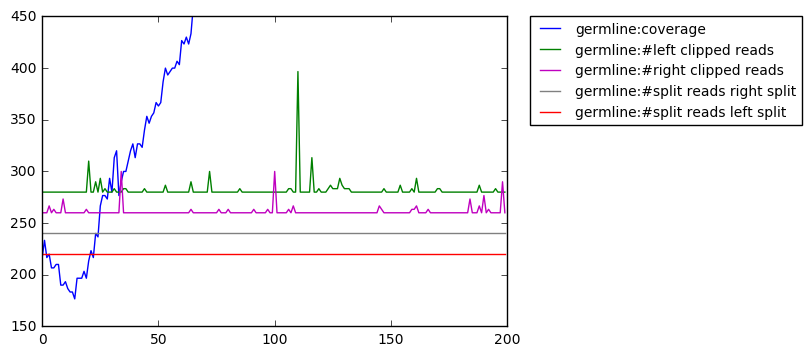

id: 35
Nanopore: DEL_start


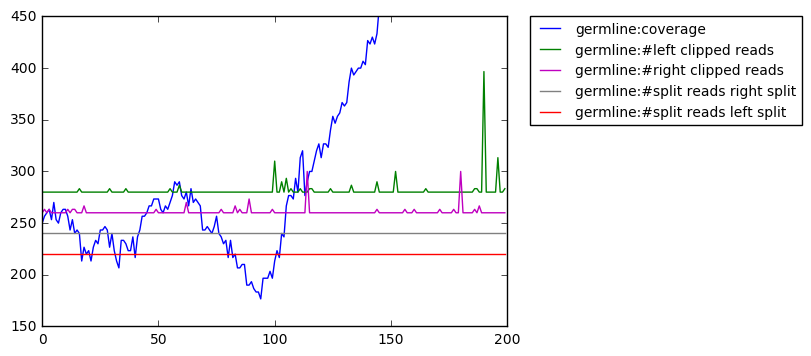

id: 36
Nanopore: DEL_start


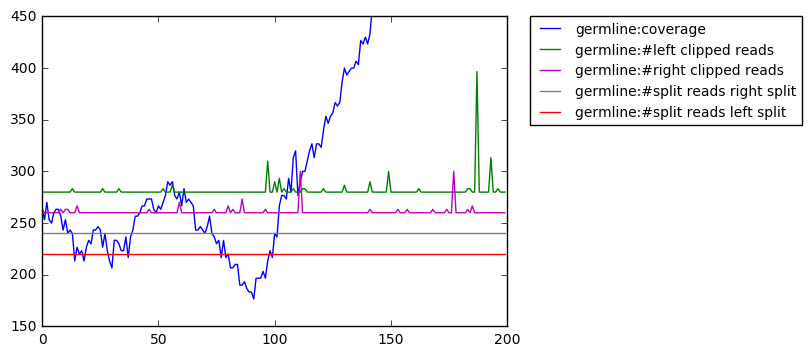

id: 37
Nanopore: DEL_start


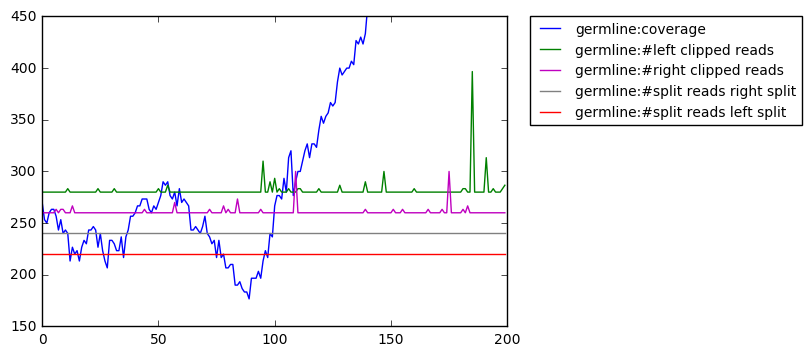

id: 38
Nanopore: DEL_start


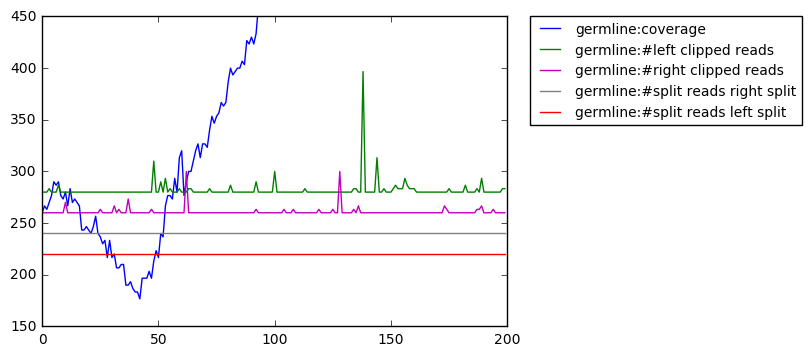

id: 39
Nanopore: DEL_start


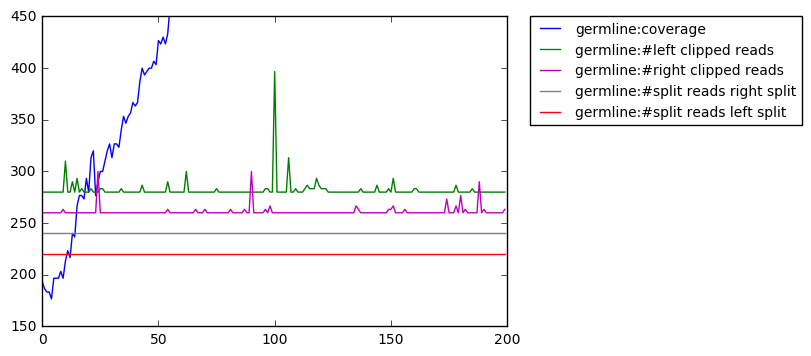

id: 40
Nanopore: DEL_start


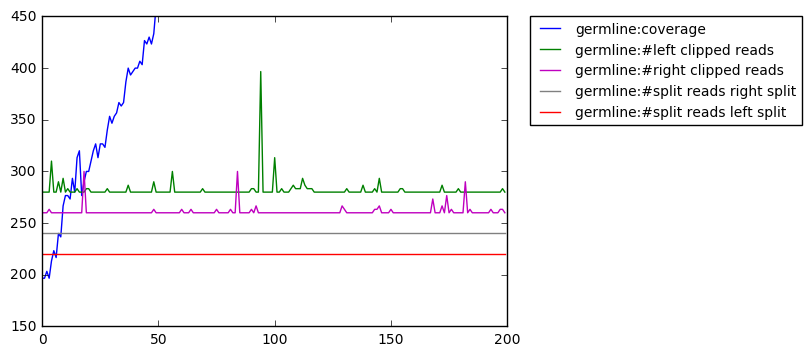

id: 41
Nanopore: DEL_start


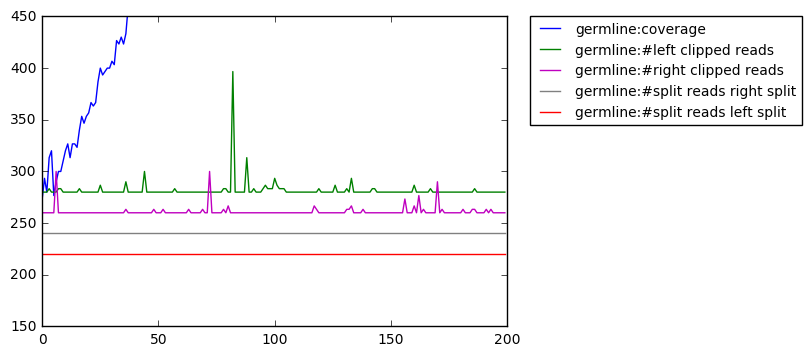

id: 42
Nanopore: DEL_end


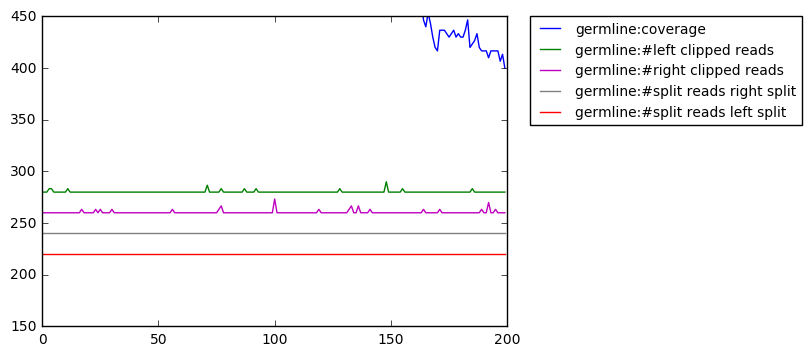

id: 43
Nanopore: DEL_end


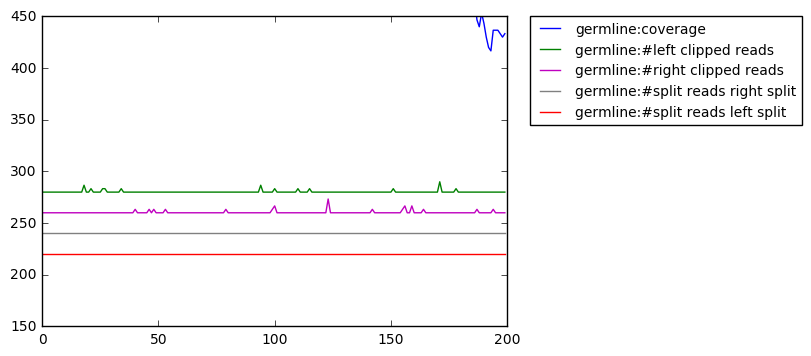

id: 44
Nanopore: DEL_end


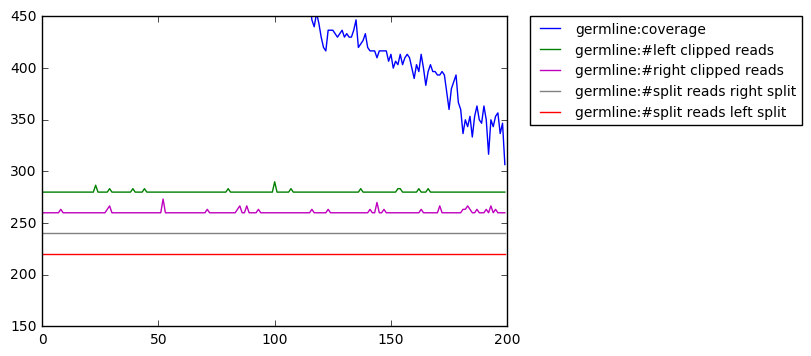

id: 45
Nanopore: DEL_end


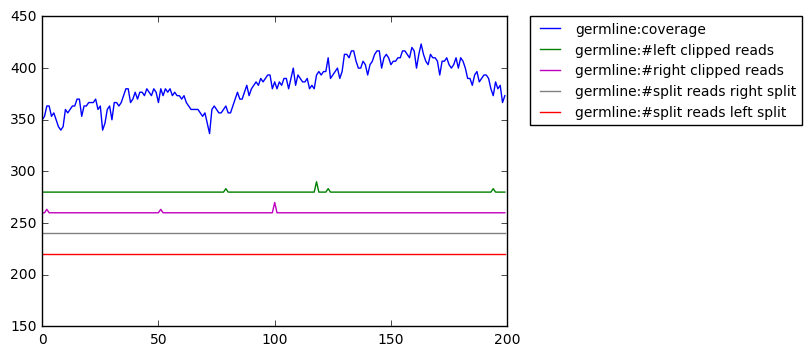

id: 46
Nanopore: DEL_end


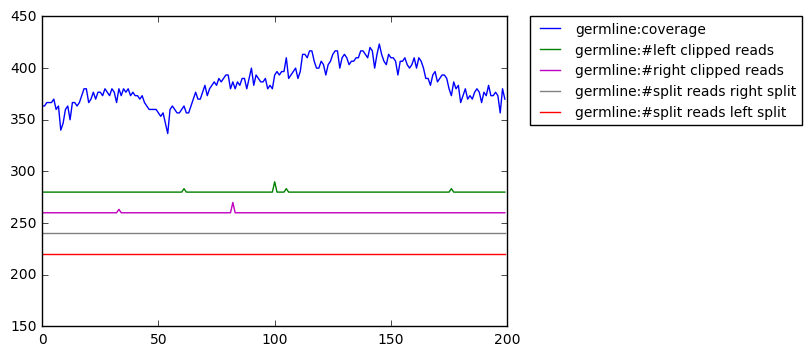

id: 47
Nanopore: DEL_end


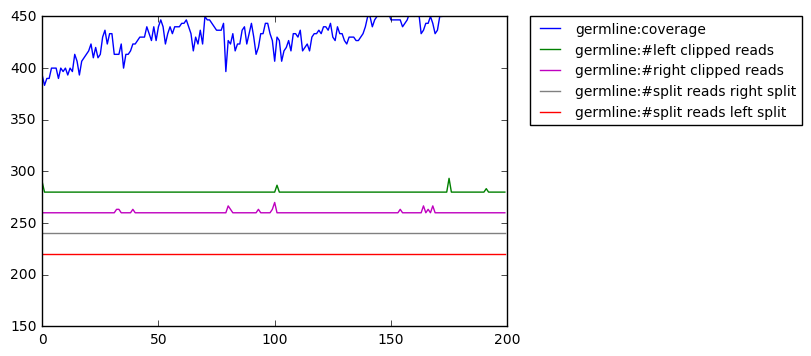

id: 48
Nanopore: DEL_end


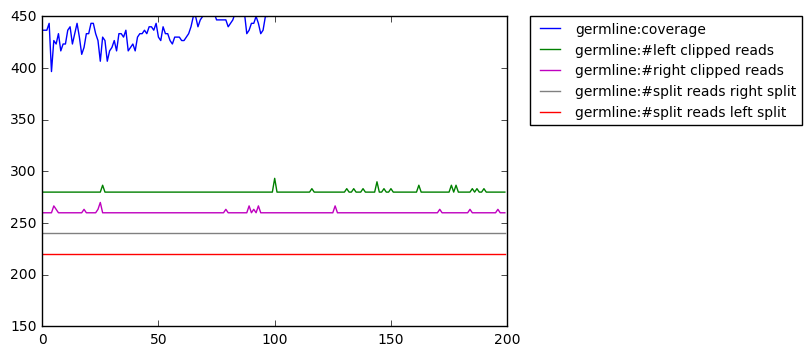

id: 49
Nanopore: DEL_end


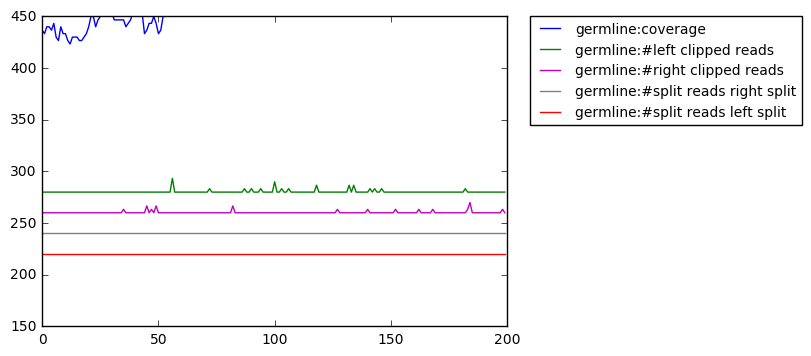

In [172]:
start_window = 0
n_windows = 50
plot_channels(start_window, n_windows)

id: 400
Nanopore: DEL_end


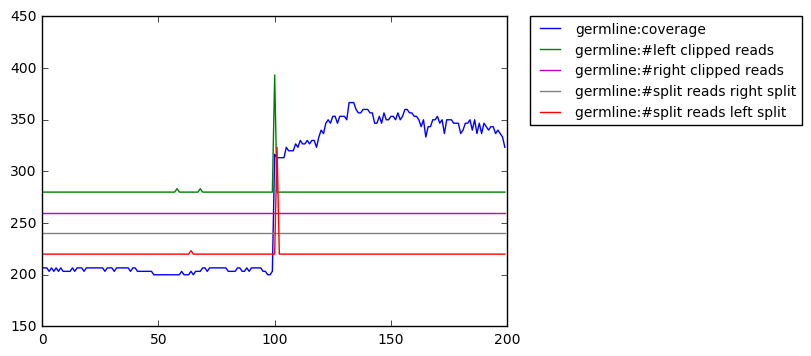

id: 401
Nanopore: DEL_start


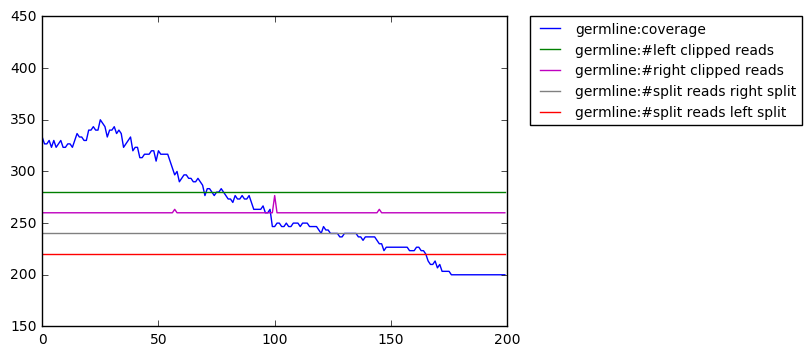

id: 402
Nanopore: DEL_end


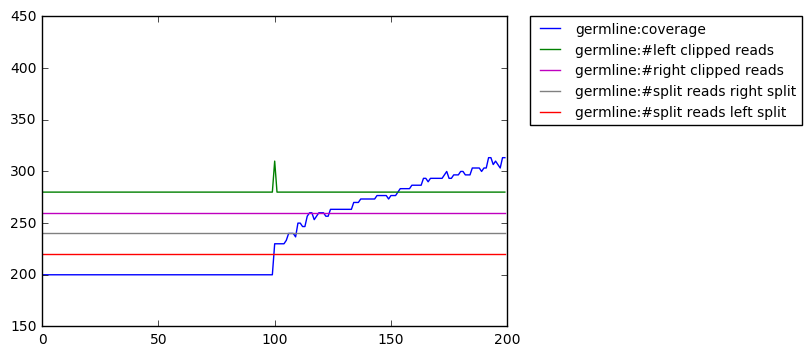

id: 403
Nanopore: DEL_start


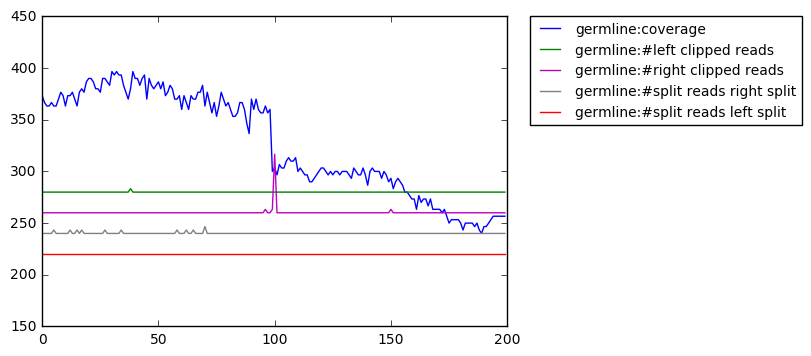

id: 404
Nanopore: DEL_end


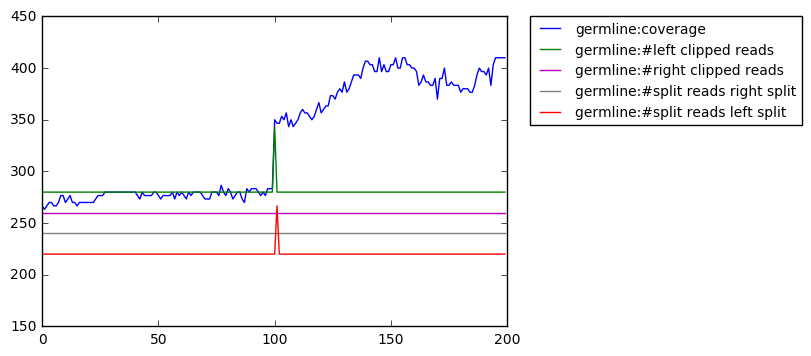

id: 405
Nanopore: DEL_start


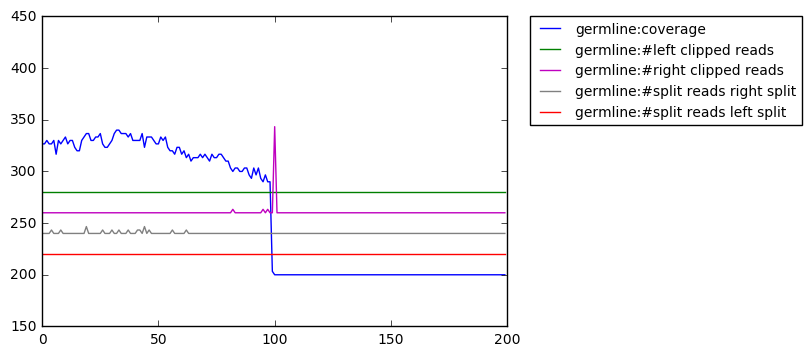

id: 406
Nanopore: DEL_end


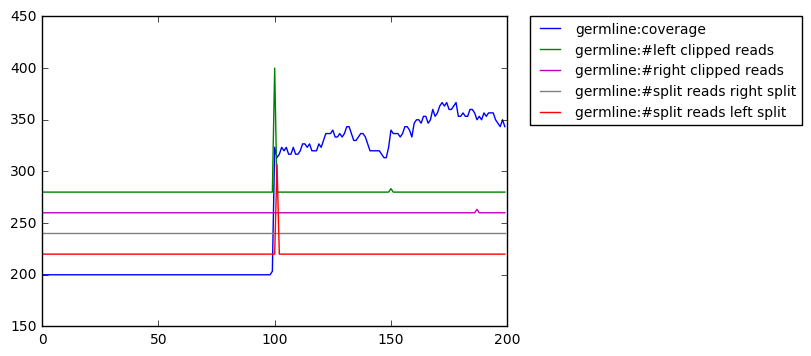

id: 407
Nanopore: DEL_start


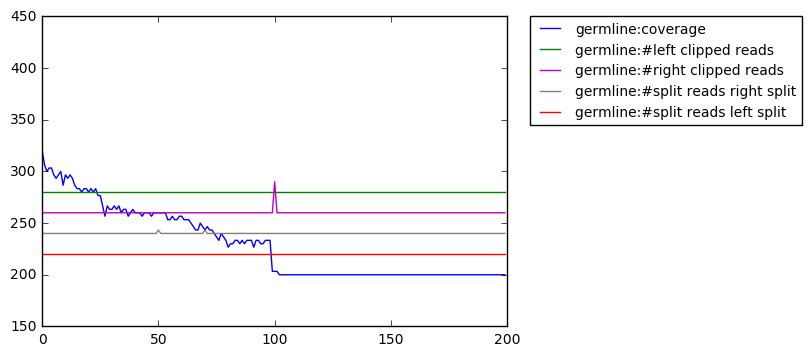

id: 408
Nanopore: DEL_end


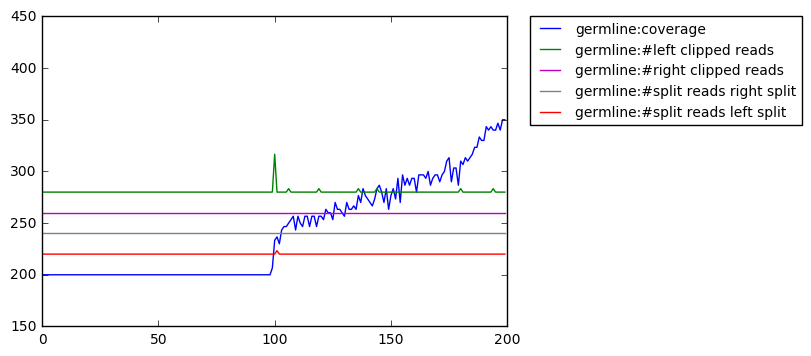

id: 409
Nanopore: DEL_start


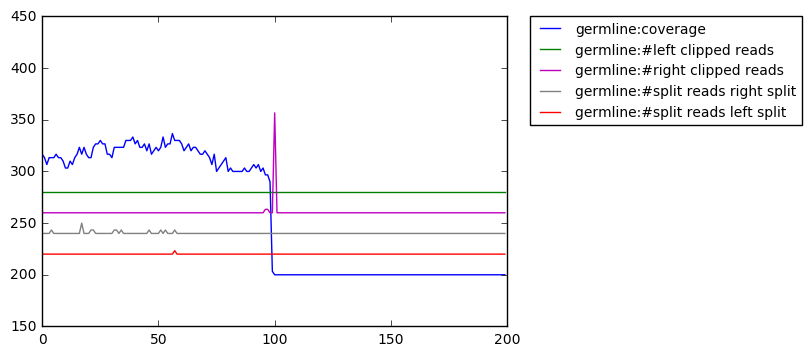

id: 410
Nanopore: DEL_end


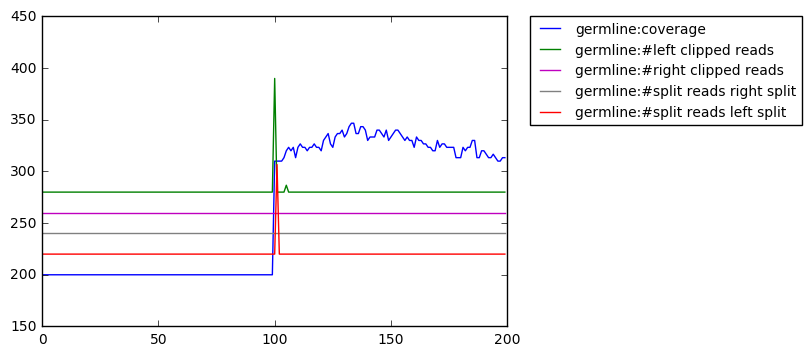

id: 411
Nanopore: DEL_start


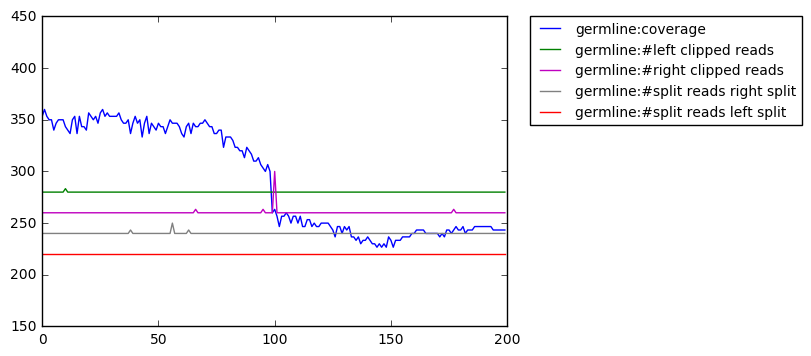

id: 412
Nanopore: DEL_end


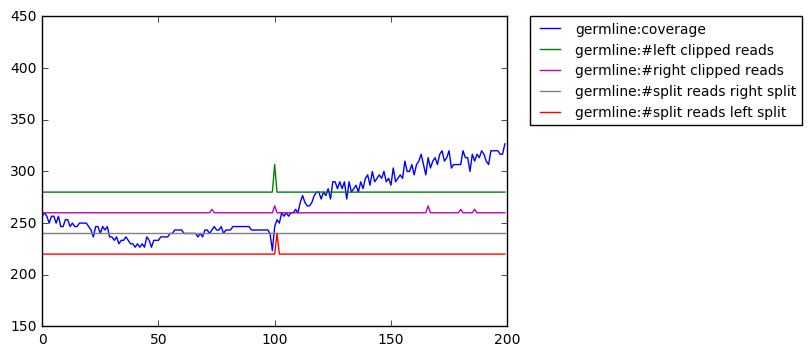

id: 413
Nanopore: DEL_start


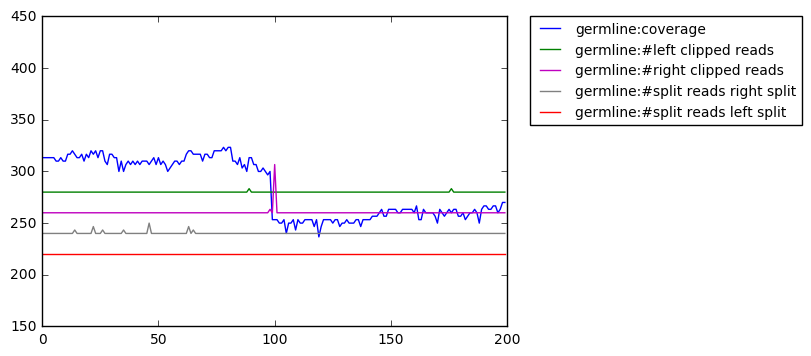

id: 414
Nanopore: DEL_end


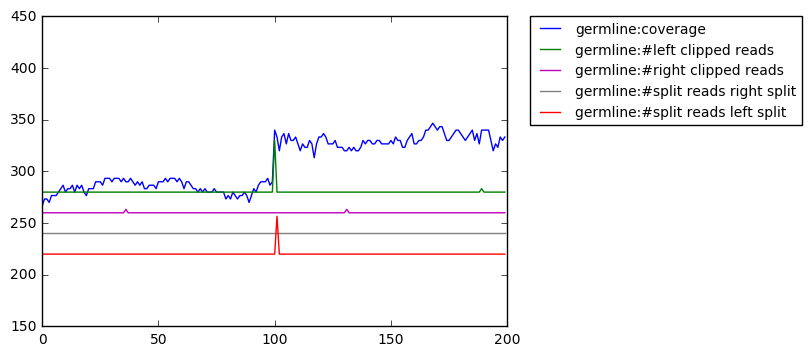

id: 415
Nanopore: DEL_start


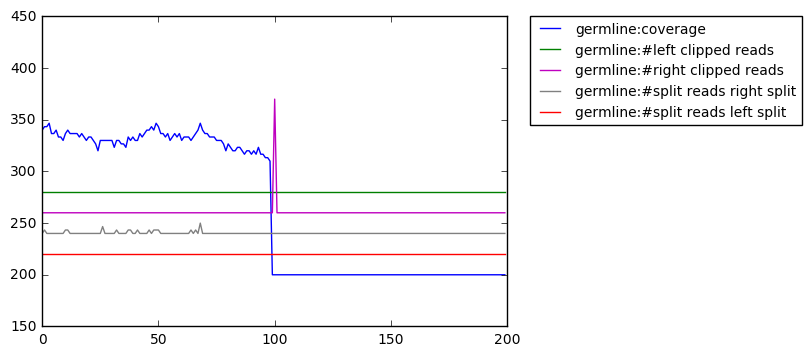

id: 416
Nanopore: DEL_end


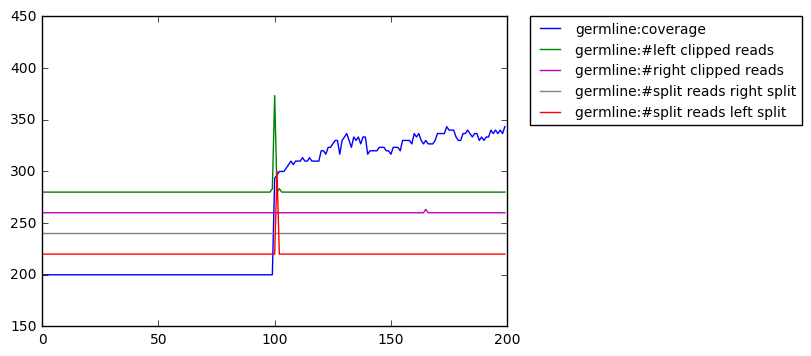

id: 417
Nanopore: DEL_start


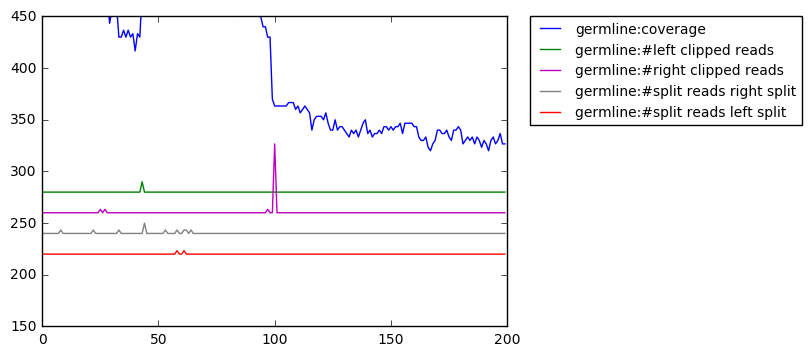

id: 418
Nanopore: DEL_start


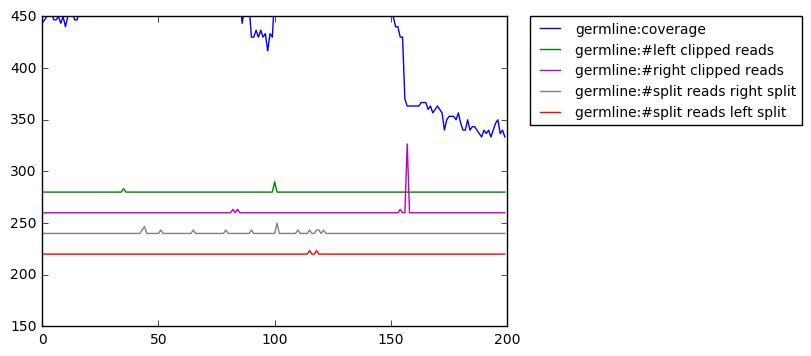

id: 419
Nanopore: DEL_end


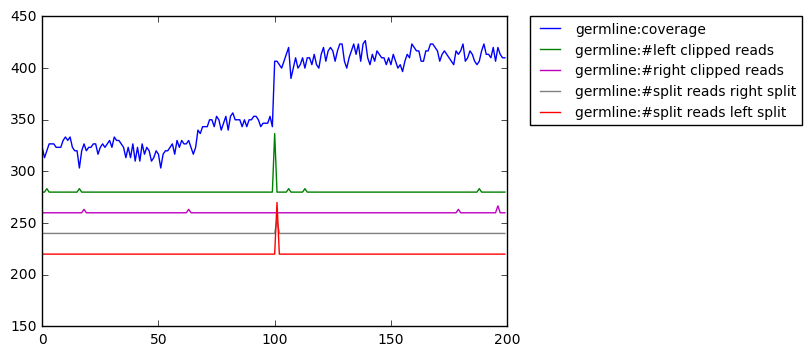

id: 420
Nanopore: DEL_start


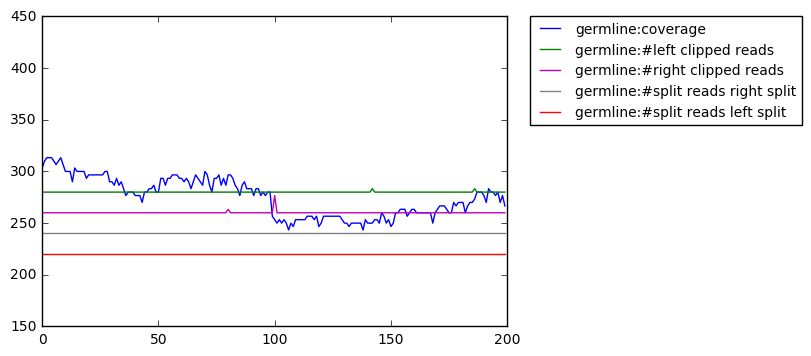

id: 421
Nanopore: DEL_end


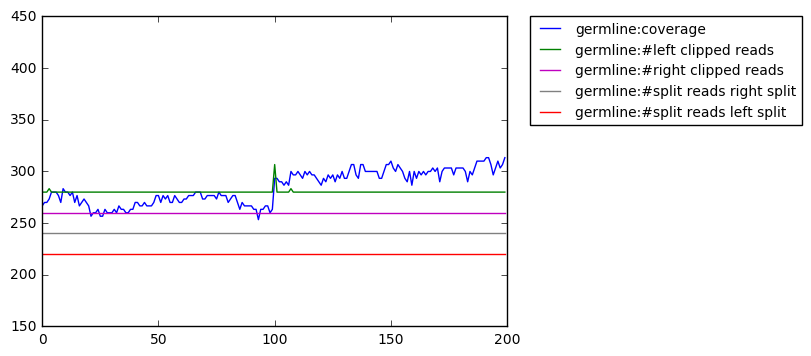

id: 422
Nanopore: DEL_start


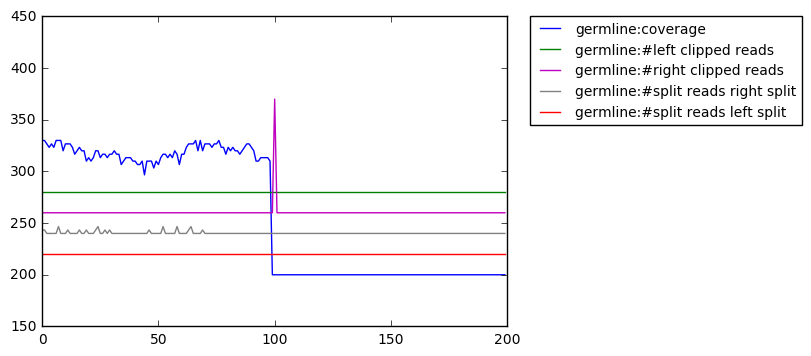

id: 423
Nanopore: DEL_end


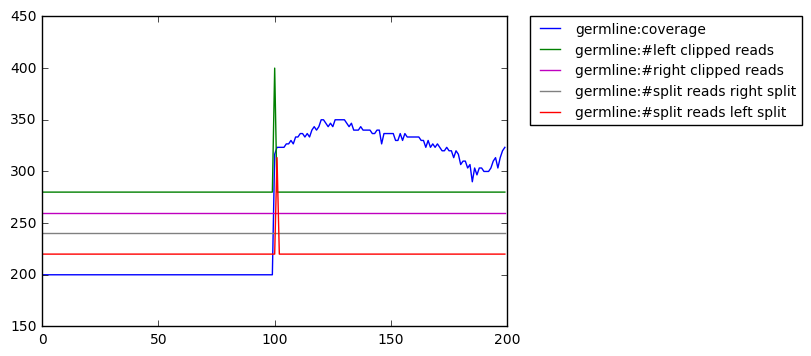

id: 424
Nanopore: DEL_start


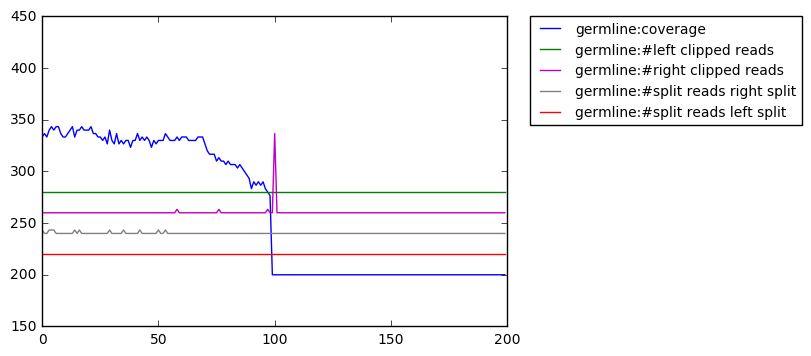

id: 425
Nanopore: DEL_end


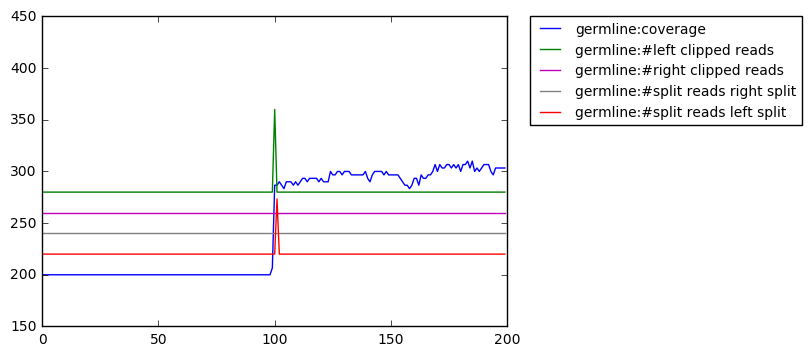

id: 426
Nanopore: DEL_start


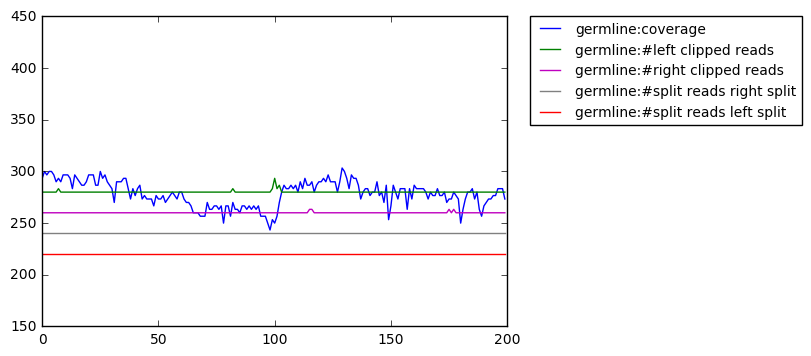

id: 427
Nanopore: DEL_start


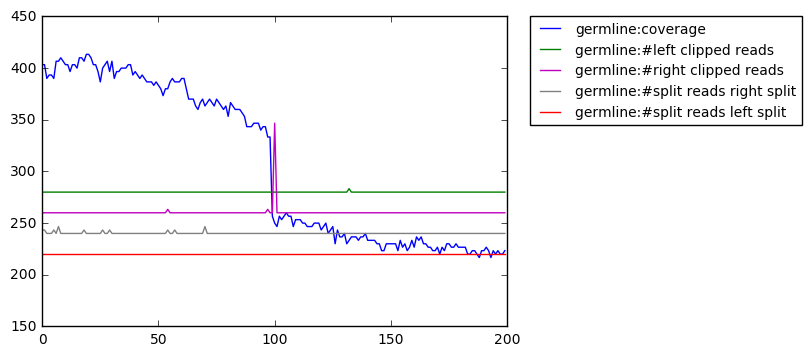

id: 428
Nanopore: DEL_end


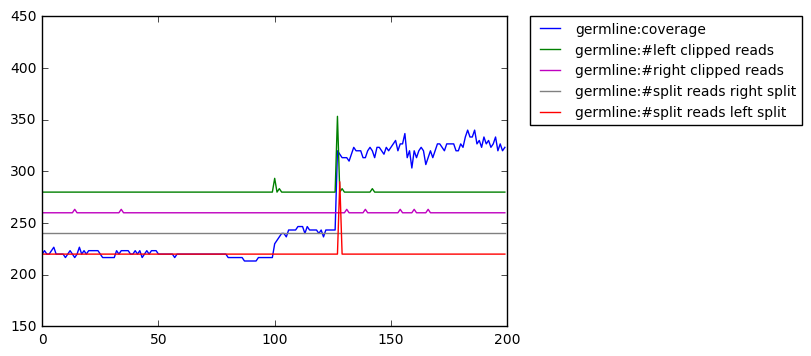

id: 429
Nanopore: DEL_end


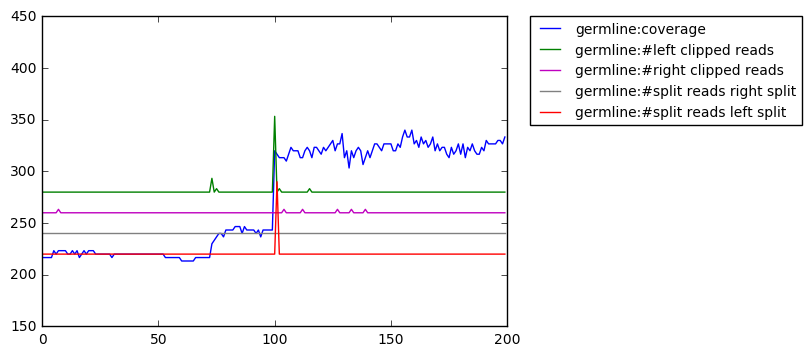

id: 430
Nanopore: DEL_start


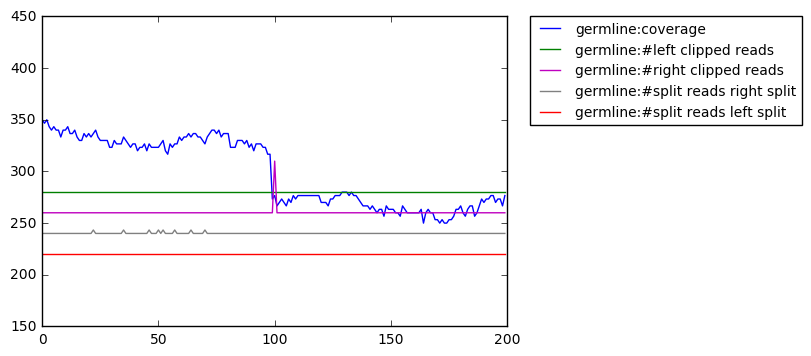

id: 431
Nanopore: DEL_end


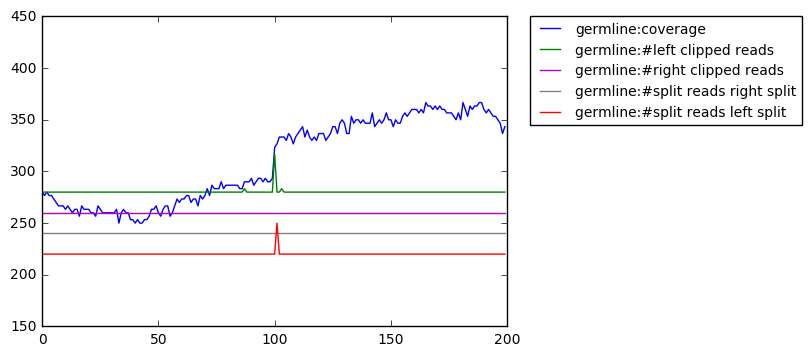

id: 432
Nanopore: DEL_start


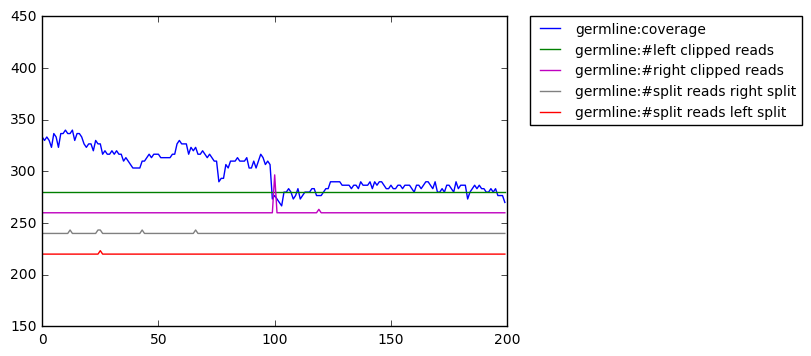

id: 433
Nanopore: DEL_end


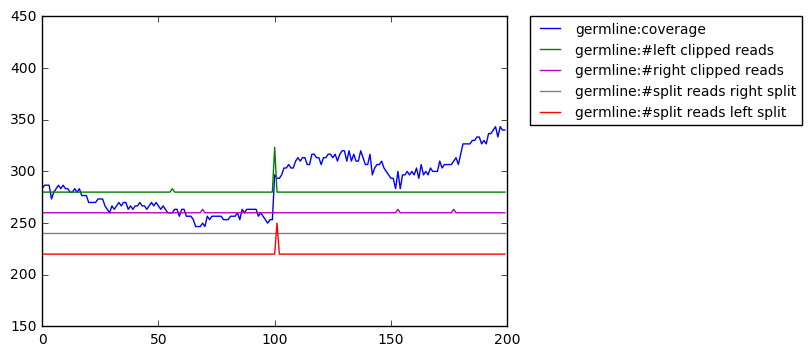

id: 434
Nanopore: DEL_start


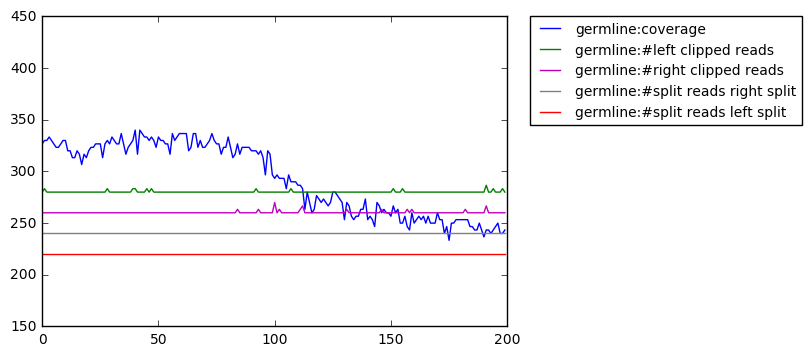

id: 435
Nanopore: DEL_start


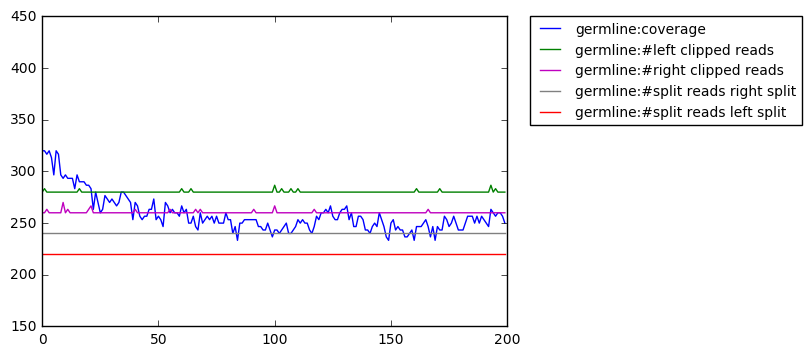

id: 436
Nanopore: DEL_start


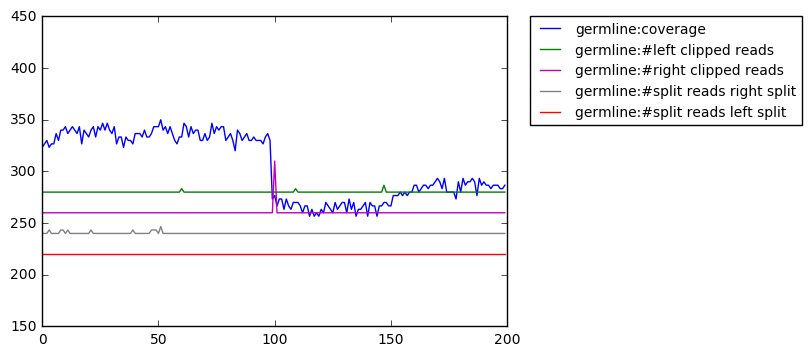

id: 437
Nanopore: DEL_end


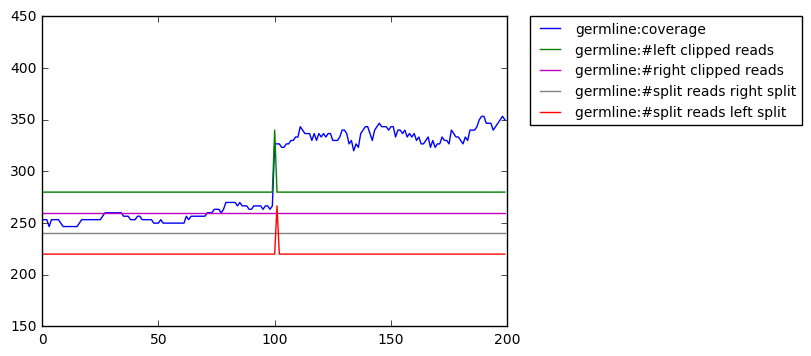

id: 438
Nanopore: DEL_start


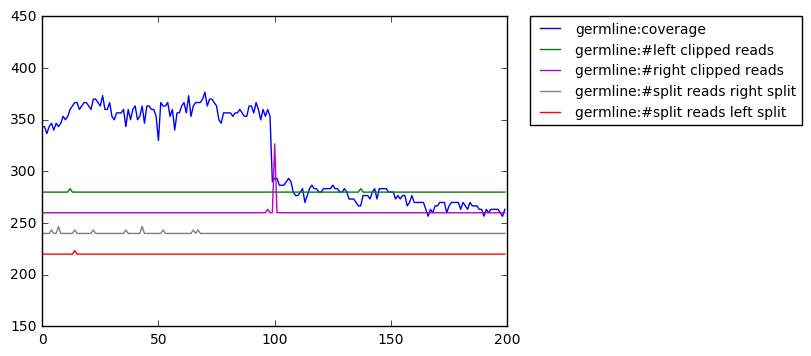

id: 439
Nanopore: DEL_end


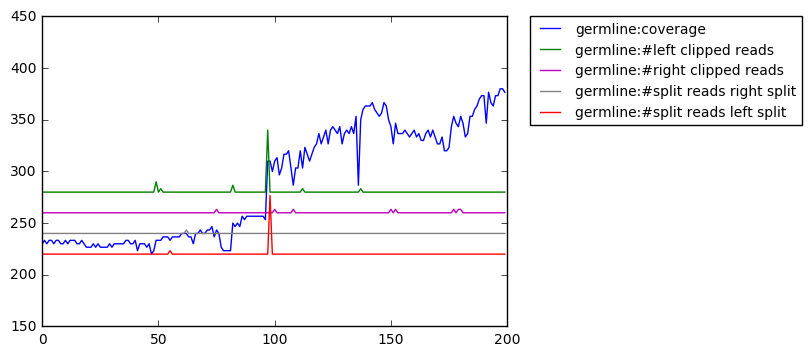

id: 440
Nanopore: DEL_end


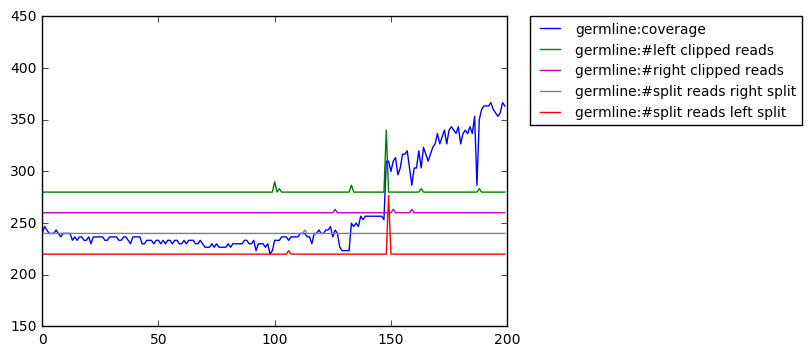

id: 441
Nanopore: DEL_end


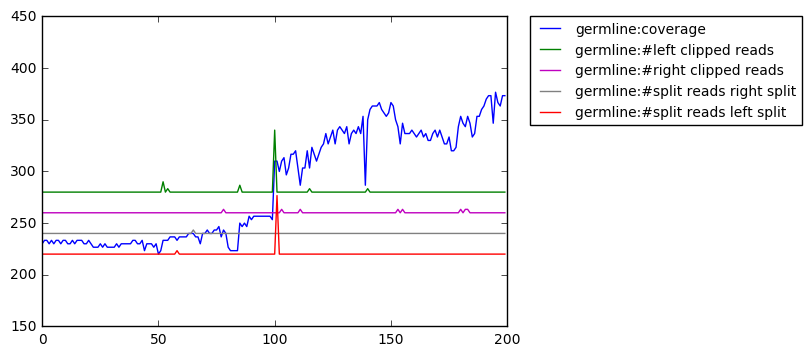

id: 442
Nanopore: DEL_start


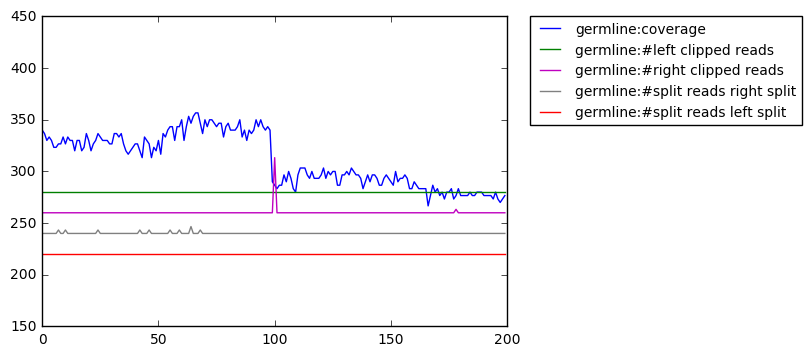

id: 443
Nanopore: DEL_end


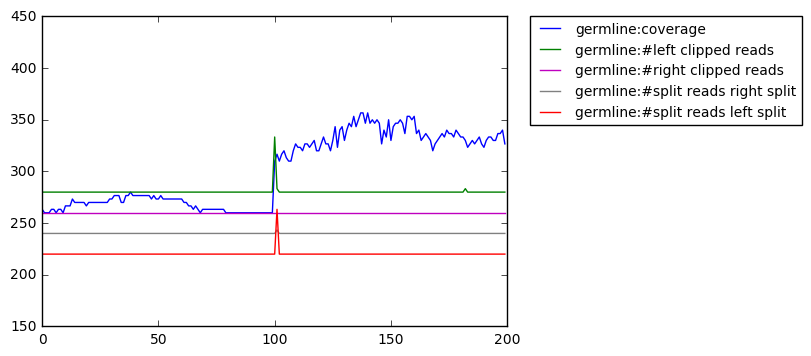

id: 444
Nanopore: DEL_start


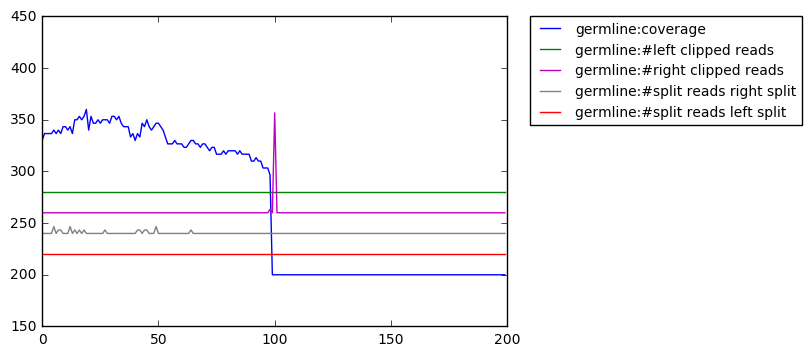

id: 445
Nanopore: DEL_end


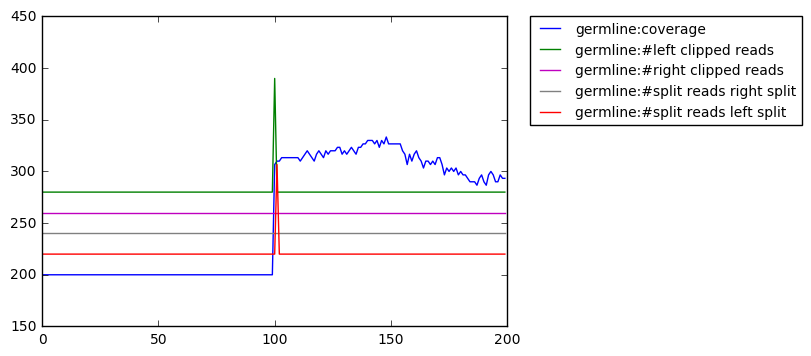

id: 446
Nanopore: DEL_end


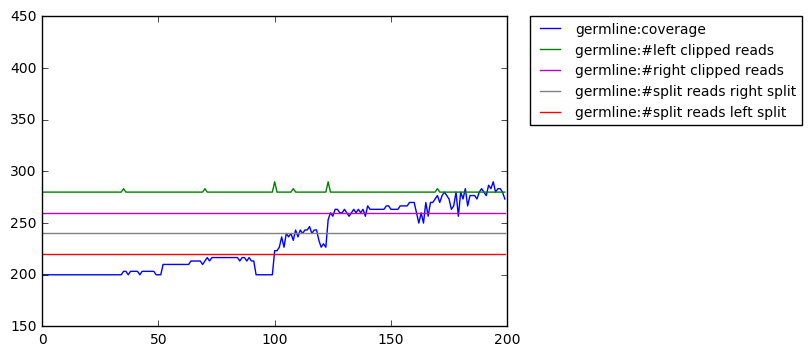

id: 447
Nanopore: DEL_end


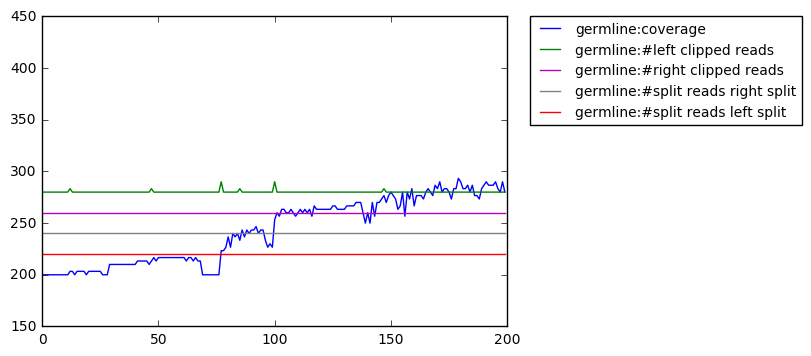

id: 448
Nanopore: DEL_start


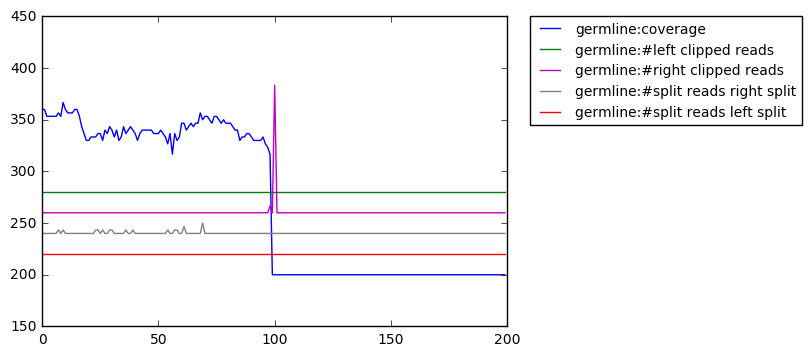

id: 449
Nanopore: DEL_end


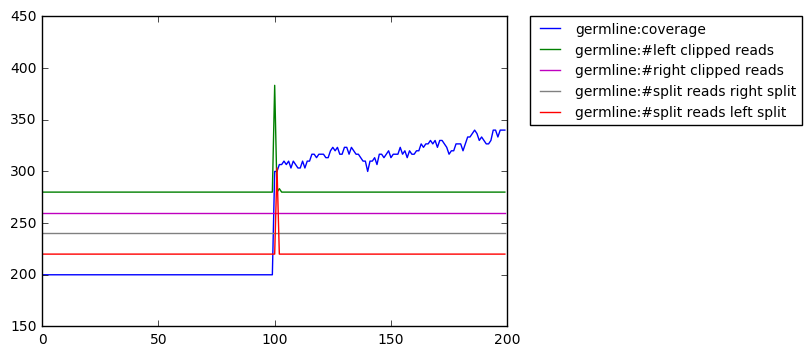

In [173]:
n_windows = 50
start_window = 400
plot_channels(start_window, n_windows)

   
## Transposes every window in X, to comply to McFly format

In [261]:
def transposeDataset(X):
    image = []
    for i in range (0, len(X -1)):
        tr = X[i].transpose()
        image.append(tr)
    return np.array(image)

image1 = transposeDataset(X_train)
image2 = transposeDataset(X_val)
image3 = transposeDataset(X_test)
X_train = image1
X_val = image2
X_test = image3

n_channels = len(X_train[0][0])
print(len(X_test[0][0]))

5


## Prepare the labels in McFly format

In [262]:
mapclasses = {'DEL_start': 1, 'DEL_end': 0}#,  'noSV': 2}
print(mapclasses)

{'DEL_start': 1, 'DEL_end': 0}


In [263]:
y_train = np.array([mapclasses[c] for c in y_train], dtype='int')
y_val = np.array([mapclasses[c] for c in y_val], dtype='int')
y_test = np.array([mapclasses[c] for c in y_test], dtype='int')
y_train_binary = to_categorical(y_train)
y_val_binary = to_categorical(y_val)
y_test_binary = to_categorical(y_test)

In [177]:
y_test_binary

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [178]:
y_val_binary

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [179]:
X_train.shape

(4000, 200, 5)

##  Generate and train neural networks 

In [264]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution1D, Flatten, MaxPooling1D
from keras.optimizers import Adam
import sys
import os
import numpy as np
sys.path.insert(0, os.path.abspath('..'))
from mcfly import modelgen, find_architecture

In [265]:
np.random.seed = 321
num_classes = y_train_binary.shape[1]

%%time
models = modelgen.generate_models(X_train.shape,
                                  num_classes,
                                  number_of_models = 1,
                                  model_type = 'CNN',
                                  cnn_min_layers=1,
                                  cnn_max_layers=1,
                                  cnn_min_filters = 3, 
                                  cnn_max_filters = 3, 
                                  cnn_min_fc_nodes=2, 
                                  cnn_max_fc_nodes=2,
                                  low_lr=1.73, high_lr=1.73,
                                  kernel_size = 11)

In [300]:
%%time
models = modelgen.generate_models(X_train.shape,
                                  num_classes,
                                  number_of_models = 1,
                                  model_type = 'CNN',
                                  cnn_min_layers=1,
                                  cnn_max_layers=1,
                                  cnn_min_filters = 4, 
                                  cnn_max_filters = 4, 
                                  cnn_min_fc_nodes=20, 
                                  cnn_max_fc_nodes=20,
                                  low_lr=1, high_lr=1,
                                  kernel_size =11)

Wall time: 749 ms


In [302]:
%%time
i=0
for model, params, model_types in models:
    print('model ' + str(i))
    i=i+1
    print(params)
    model.summary()

model 0
{'fc_hidden_nodes': 20, 'filters': array([4]), 'kernel_size': 11, 'learning_rate': 0.1, 'regularization_rate': 0.0011163022240366265}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_57 (Batc (None, 200, 5)            20        
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 200, 4)            224       
_________________________________________________________________
batch_normalization_58 (Batc (None, 200, 4)            16        
_________________________________________________________________
activation_57 (Activation)   (None, 200, 4)            0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 20)                16020     


In [295]:
train_set_size = X_train.shape[0]
train_set_size

9000

In [307]:
%%time
histories, val_accuracies, val_losses = find_architecture.train_models_on_samples(X_train, y_train_binary,
                                                                                 X_val, y_val_binary,
                                                                                 models,nr_epochs=1, 
                                                                                 subset_size=train_set_size,
                                                                                 verbose=True)

Training model 0 CNN
Train on 9000 samples, validate on 1000 samples
Epoch 1/1
9000/9000 [==============================] - 5s 565us/step - loss: 0.3724 - acc: 0.8662 - val_loss: 0.3741 - val_acc: 0.9060
Wall time: 5.09 s


## Save the best model

In [308]:
best_model_index = np.argmax(val_accuracies)
best_model, best_params, best_model_types = models[best_model_index]
print(best_model_index, best_model_types, best_params)

0 CNN {'fc_hidden_nodes': 20, 'filters': array([4]), 'kernel_size': 11, 'learning_rate': 0.1, 'regularization_rate': 0.0011163022240366265}


In [314]:
from keras.models import load_model

model_path = os.path.join('F:/CNN/notebooks/', 'Gtcg_10_08_p1p2_del_st_end87')

best_model.save(model_path)

## Train the best model on the full dataset

In [75]:
#We make a copy of the model, to start training from fresh
nr_epochs = 1
datasize = train_set_size # Change in `X_train.shape[0]` if training complete data set
history = best_model.fit(X_train[:datasize,:,:], y_train_binary[:datasize,:],
              epochs=nr_epochs, validation_data=(X_val, y_val_binary))

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 2s 508us/step - loss: 0.1983 - acc: 0.9263 - val_loss: 0.4215 - val_acc: 0.8270


## Reload the trained model

In [204]:
import os
from keras.models import load_model
model_path = os.path.join('F:/CNN/notebooks/', 'Gtcg_08_08_18_val69')
model_reloaded = load_model(model_path)

## Inspect model predictions on test data

In [309]:

model = best_model
datasize = X_test.shape[0]
probs = model.predict_proba(X_test[:datasize,:,:],batch_size=1)

## Columns are predicted labels by DeepSV, rows are nanopore labels

In [310]:
mapclasses = {'DEL_end': 0, 'DEL_start': 1}#, 'noSV': 2}
dict=mapclasses
dict_sorted = sorted(dict.items(), key=lambda x: x[1])
dict_sorted

[('DEL_end', 0), ('DEL_start', 1)]

In [311]:
labels = [i[0] for i in dict_sorted]

In [312]:
import pandas as pd
predicted = probs.argmax(axis=1)
y_index = y_test_binary.argmax(axis=1)
confusion_matrix = pd.crosstab(pd.Series(y_index), pd.Series(predicted))
confusion_matrix.index = [labels[i] for i in confusion_matrix.index]
confusion_matrix.columns = [labels[i] for i in confusion_matrix.columns]
confusion_matrix.reindex(columns=[l for l in labels], fill_value=0)
confusion_matrix

DEL_end  DEL_start
DEL_end        675        103
DEL_start       85        655

## Test best current model on testset

### Overall accuracy on the test set:

In [313]:
%%time
score_test = model.evaluate(X_test, y_test_binary, verbose=False)
print('Test loss and accuracy of best model: ' + str(score_test))

Test loss and accuracy of best model: [0.41825834654850763, 0.87615283283163281]
Wall time: 347 ms
